# Data_Numbers
This is a script ment to be a bit shorter with less data to read in. 

This is not a script for plots but for returning various interesting numbers such as expected number of events, figure of merit...

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
#!/usr/bin/env python
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import glob
import random

import aux
import data_classes as dc
import myplot as mypl
import physics as ph

import multiprocessing as mp


inputpath = aux.COMMON_INPUT_PATH
outputpath = aux.COMMON_OUTPUT_PATH
dirLabel = mypl.dirLabel
muondatapath = aux.MUON_DATA_PATH
print(muondatapath)


massLabels = [r"$m_a=300\,$MeV",r"$m_a=1\,$GeV",
              r"$m_a=10\,$GeV",r"$m_a=50\,$GeV"]
masses_org = [0.3,1,10,50]

#intlumi = 150 #fb-1
intlumi = 150*1000 #pb-1

# cross-sections in pb
cross_incl_all = [0.08800288, 0.0878576, 0.0923017, 0.09592004, 0.09589373000000001, 
                  0.09378335999999998, 0.08844931999999998, 0.08216535999999999, 0.06951777000000002, 
                  0.04509247499999999]
cross_incl_org = []
cross_incl_org.append(cross_incl_all[1])
cross_incl_org.append(cross_incl_all[2])
cross_incl_org.append(cross_incl_all[5])
cross_incl_org.append(cross_incl_all[8])

cross_bkg_all = [0.017120891, 0.01883237, 0.02008674, 0.022096349999999997]
cross_ttj = [233.923699] #100000 gen events eta jet 3
cross_bkg_org = [cross_bkg_all[2]] + cross_ttj

N_incl_org = []
for i in range(len(masses_org)):
    N_incl_org.append(100000)
N_ttj_org = [100*100000]
N_bkg_org = [100000]
N_bkg_org += N_ttj_org
N_ttj_charge = [100*100000]

/eos/user/l/lrygaard/ttalp/ttj_cluster_runs/


## Reading files

In [14]:
print("Reading files")
#Filenames of the lhe files we want to read in and sort them by ascending mass
filenames_inclusive= []
filenames_inclusive.append(inputpath+"inclusive/ma000300.lhe")
filenames_inclusive.append(inputpath+"inclusive/ma001000.lhe")
filenames_inclusive.append(inputpath+"inclusive/ma010000.lhe")
filenames_inclusive.append(inputpath+"inclusive/ma050000.lhe")
print(filenames_inclusive)

filenames_bkg=[inputpath+"Bkg/Bkg_3.lhe"]
print(filenames_bkg)

print("   Done")

Reading files
['/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma000300.lhe', '/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma001000.lhe', '/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma010000.lhe', '/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma050000.lhe']
['/eos/user/j/jalimena/TTALP/lhe_files/Bkg/Bkg_3.lhe']
   Done


In [4]:
data_inclusive_input = [dc.Dataset.from_lhe_alp(filename)
                     for filename in filenames_inclusive]
data_bkg_input = [dc.Dataset.from_lhe_alp(filename)
                     for filename in filenames_bkg]
data_ttj_input = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt")]
data_ttj_pair = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt",option_req=2)]
data_ttj_nonpair = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt",option_req=-2)]
data_ttj_comb = [dc.Dataset.concaternate_datasets(data_ttj_pair[0],data_ttj_nonpair[0])]
print(data_ttj_comb)

OSError: [Errno 5] Input/output error: '/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma000300.lhe'

In [9]:
data_ttj_input = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt")]

/eos/user/l/lrygaard/ttalp/ttj_cluster_runs/muon_data.txt read with [top, antitop, muon, antimuon] in 192479 Events.


In [7]:
data_ttj_input = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt",option_req=0)]

/eos/user/l/lrygaard/ttalp/ttj_cluster_runs/muon_data.txt read with [top, antitop, muon, antimuon] in 1407 Events.


In [16]:
data_ttj_pair = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt",option_req=2)]
data_ttj_nonpair = [dc.Dataset.from_txt_bkg(muondatapath+"muon_data.txt",option_req=-2)]

/eos/user/l/lrygaard/ttalp/ttj_cluster_runs/muon_data.txt read with [top, antitop, muon, antimuon] in 70090 Events.
/eos/user/l/lrygaard/ttalp/ttj_cluster_runs/muon_data.txt read with [top, antitop, muon, antimuon] in 122097 Events.


## Make the first cut for |eta| < 2.5 for all data samples

In [ ]:
# Make a cut for |eta|<2.5
sel = ((lambda x: abs(x)<2.5),"eta", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive_input]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg_input]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_input]
data_ttj_pair = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_pair]
data_ttj_nonpair = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_nonpair]
data_ttj_comb = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_comb]
sel = ((lambda x: abs(x)<2.5),"eta", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
data_ttj_pair = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_pair]
data_ttj_nonpair = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_nonpair]
data_ttj_comb = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_comb]

data_inclusive_org = data_inclusive.copy()
data_bkg_org = data_bkg.copy()
data_ttj_org = data_ttj.copy()
data_ttj_pair_org = data_ttj_pair.copy()
data_ttj_nonpair_org = data_ttj_nonpair.copy()
print(data_inclusive_org)
print(data_bkg_org)
print(data_ttj_org)
print(data_ttj_pair_org)
print(data_ttj_nonpair_org)
print(data_ttj_comb)

In [10]:
# Make a cut for |eta|<2.5
sel = ((lambda x: abs(x)<2.5),"eta", ["muon"])
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_input]
sel = ((lambda x: abs(x)<2.5),"eta", ["antimuon"])
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
data_ttj_org = data_ttj.copy()
print(data_ttj_org)


[This Dataset contains 87671 events.]


## Functions

In [11]:
def get_expected_events(datasets, cross_sections, intlumi, N_tot):
    if len(datasets) != len(cross_sections):
        print("Error: len(datasets) != len(cross_sections)")
    if len(datasets) != len(N_tot):
        print("Error: len(datasets) != len(N_tot)")
    else:
        for i in range(len(datasets)):
            n = len(datasets[i].events)*cross_sections[i]*intlumi/N_tot[i]
            sigma_n = math.sqrt(len(datasets[i].events))*cross_sections[i]*intlumi/N_tot[i]             
            print("Expected number of events: ", n, " +- ", sigma_n)

def get_figure_of_merit(signal, signal_cross, signal_N, background, background_cross, background_N, intlumi):
    nS = len(signal.events)*signal_cross*intlumi/signal_N
    nB = 0
    sigmaB2 = 0
    for i in range(len(background)):
        nB += len(background[i].events)*background_cross[i]*intlumi/background_N[i]
        sigmaBi = math.sqrt(len(background[i].events))*background_cross[i]*intlumi/background_N[i]
        sigmaB2 += sigmaBi*sigmaBi
    sigmaB = math.sqrt(sigmaB2)
    s = nS/math.sqrt(nS+nB+sigmaB)
    return s

In [12]:
def data(which, whose, where, **kwargs):
    """calculates a specific observable for a specific dataset
    
    which - the observable calculated (e.g.: "pT", "theta", "oA")
    whose - list of the particle's converned (e.g.: ["alp"], ["top", "antitop"])
    where - the dataset used (e.g. "incl"); to return only a single dataset's 
       observable data, set where = ("incl", 3) for the 4th dataset in "incl"
    additional arguments for the observable function can be placed in kwargs
    if we want the average instead of the full dataset, add average=True"""
    if where == "incl":
        return [ds.observables(which, whose, **kwargs) for ds in data_inclusive]
    elif where == "bkg":
        return [ds.observables(which, whose, **kwargs) for ds in data_bkg]
    elif len(where)==2:
        if where[0] == "incl":
            return data_inclusive[where[1]].observables(which, whose, **kwargs)
        elif where[0] == "bkg":
            return data_bkg[where[1]].observables(which, whose, **kwargs)
    else:
        raise ValueError(f"Dataset-List {where} not defined.")

In [15]:

N_ttj = N_ttj_org
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

Expected number of events:  307624.869225435  +-  1038.947164057959


# Selections applied in cumulative order

### muon pT > 10 GeV -- DeltaR(muon,antimuon) > 0.2

In [ ]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
data_ttj = data_ttj_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
print(data_inclusive)
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
print(data_bkg)
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
print(data_ttj_comb)
get_expected_events(data_ttj_comb, cross_ttj, intlumi, N_ttj)

print(" -- pT > 10 GeV --")

sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
data_ttj_comb = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_comb]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
data_ttj_comb = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_comb]

print("Signal:")
print(data_inclusive)
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
print(data_bkg)
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
print(data_ttj_comb)
get_expected_events(data_ttj_comb, cross_ttj, intlumi, N_ttj)

for i in range(len(data_inclusive)):
    print("Figure of merit:  ", masses[i], ":  ", get_figure_of_merit(data_inclusive[i],cross_incl[i],N_incl[i],data_bkg[1],cross_bkg[1],N_bkg[1],intlumi))
    print("Figure of merit:  ", masses[i], ":  ", get_figure_of_merit(data_inclusive[i],cross_incl[i],N_incl[i],data_bkg,cross_bkg,N_bkg,intlumi))

print(" -- DeltaR > 0.2 --")    
    
sel = ((lambda x: x>0.2),"deltaR", ["muon","antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
data_ttj_comb = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj_comb]

print("Signal:")
print(data_inclusive)
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
print(data_bkg)
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
print(data_ttj_comb)
get_expected_events(data_ttj_comb, cross_ttj, intlumi, N_ttj)

for i in range(len(data_inclusive)):
    print("Figure of merit:  ", masses[i], ":  ", get_figure_of_merit(data_inclusive[i],cross_incl[i],N_incl[i],data_bkg[1],cross_bkg[1],N_bkg[1],intlumi))
    print("Figure of merit:  ", masses[i], ":  ", get_figure_of_merit(data_inclusive[i],cross_incl[i],N_incl[i],data_bkg,cross_bkg,N_bkg,intlumi))


# Figure of merit depending on different cut values

### Muon pT cut

In [11]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
data_ttj = data_ttj_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

s_pT_03 = []
s_pT_1 = []
s_pT_10 = []
s_pT_50 = []
s_pT = [s_pT_03, s_pT_1, s_pT_10, s_pT_50]
s_pT_03_bkg = []
s_pT_1_bkg = []
s_pT_10_bkg = []
s_pT_50_bkg = []
s_pT_bkg = [s_pT_03_bkg, s_pT_1_bkg, s_pT_10_bkg, s_pT_50_bkg]

pT_cut = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in range(len(pT_cut)):
    print("pT cut: ", pT_cut[i])
    sel = ((lambda x: x>pT_cut[i]),"pT", ["muon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    sel = ((lambda x: x>pT_cut[i]),"pT", ["antimuon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    print("Signal:")
    print(data_inclusive)
    get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
    print("Background:")
    print(data_bkg)
    get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
    print(data_ttj)
    get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
    for j in range(len(s_pT)):
        s_pT[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],[data_bkg[1]],[cross_bkg[1]],[N_bkg[1]],intlumi))
        s_pT_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlumi))
    print("Figure of merit:   ", s_pT[1][i])

Signal:
Expected number of events:  12702.627523199999  +-  40.91495511207905
Expected number of events:  13332.011397150001  +-  42.96336782148811
Expected number of events:  13344.434294399998  +-  43.32699883608477
Expected number of events:  9673.119624420002  +-  31.759731703044572
Background:
Expected number of events:  3013.011  +-  9.527977375141589
Expected number of events:  108363.983943255  +-  616.6308129146178
Expected number of events:  203415.37017642  +-  844.8403028838271
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
pT cut:  5
Signal:
[This Dataset contains 95407 events., This Dataset contains 85681 events., This Dataset contains 83676 events., This Dataset contains 89713 events.]
Expected number of events:  12573.345064799998  +-  40.706214292755824
Expected number of events:  11862.75293655  +-  40.52688483075569
Expected number of events:  11771.124647039998  +-  40.69279334928161
Expected number of event

Signal:
[This Dataset contains 78727 events., This Dataset contains 63536 events., This Dataset contains 62921 events., This Dataset contains 73307 events.]
Expected number of events:  10375.1479128  +-  36.97706576914163
Expected number of events:  8796.7212168  +-  34.898832130961964
Expected number of events:  8851.414191839998  +-  35.28700958559197
Expected number of events:  7644.208748085003  +-  28.23318115926794
Background:
[This Dataset contains 82825 events., This Dataset contains 98 events., This Dataset contains 213 events.]
Expected number of events:  2495.52636075  +-  8.671244648682055
Expected number of events:  343.86783753000003  +-  34.73589710705957
Expected number of events:  747.3862183049999  +-  51.21005986632809
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
Figure of merit:    91.83539569805782
pT cut:  15
Signal:
[This Dataset contains 76671 events., This Dataset contains 61441 events., This Dataset 

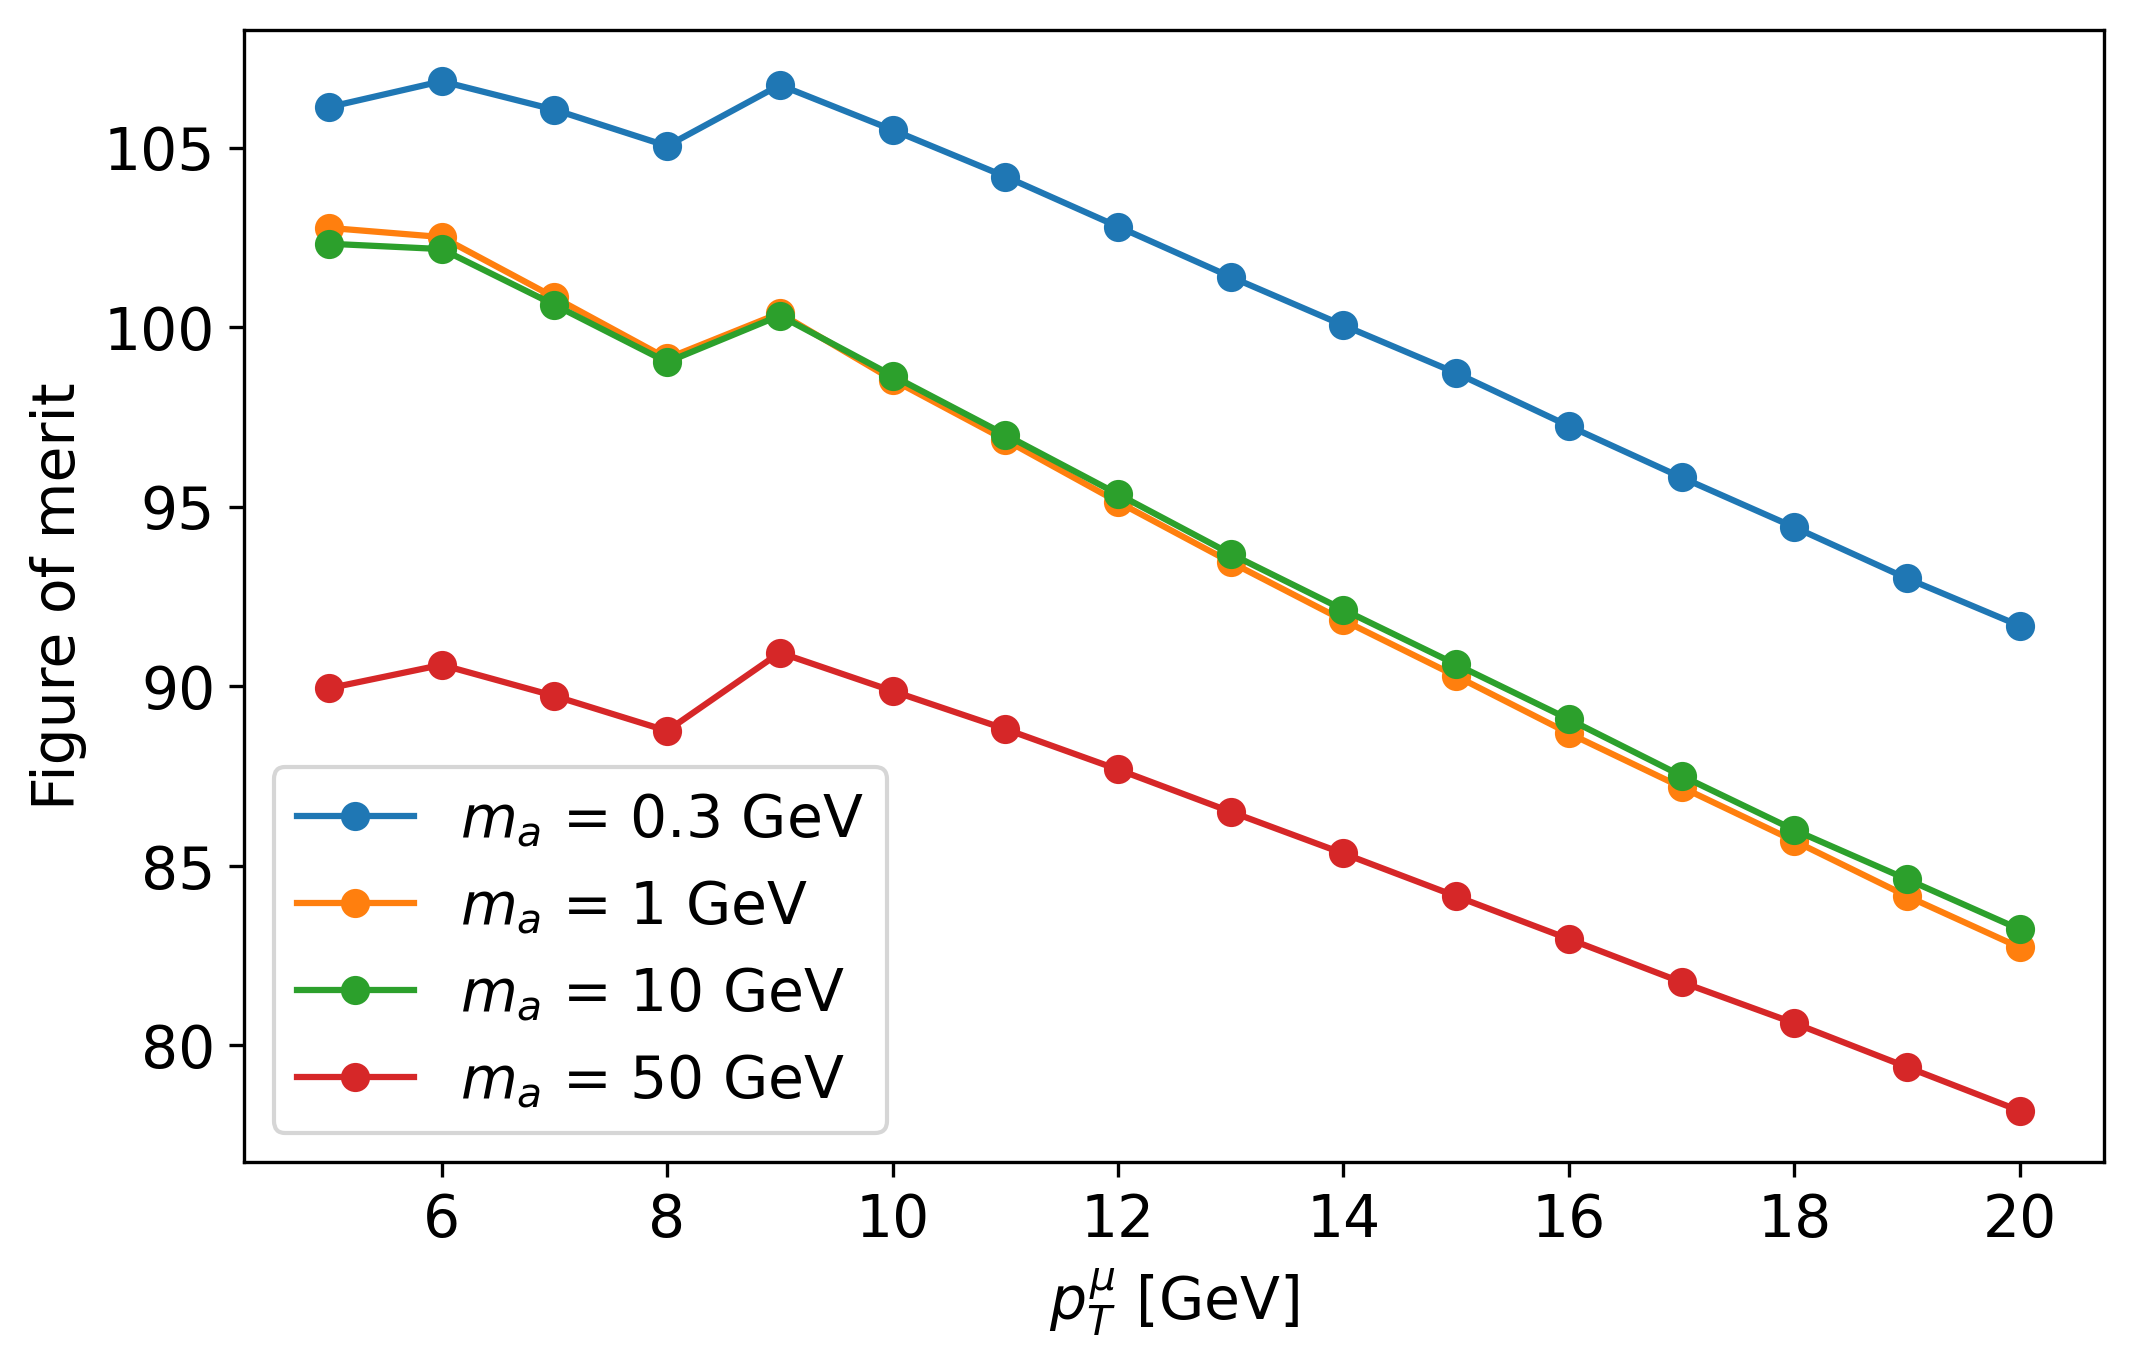

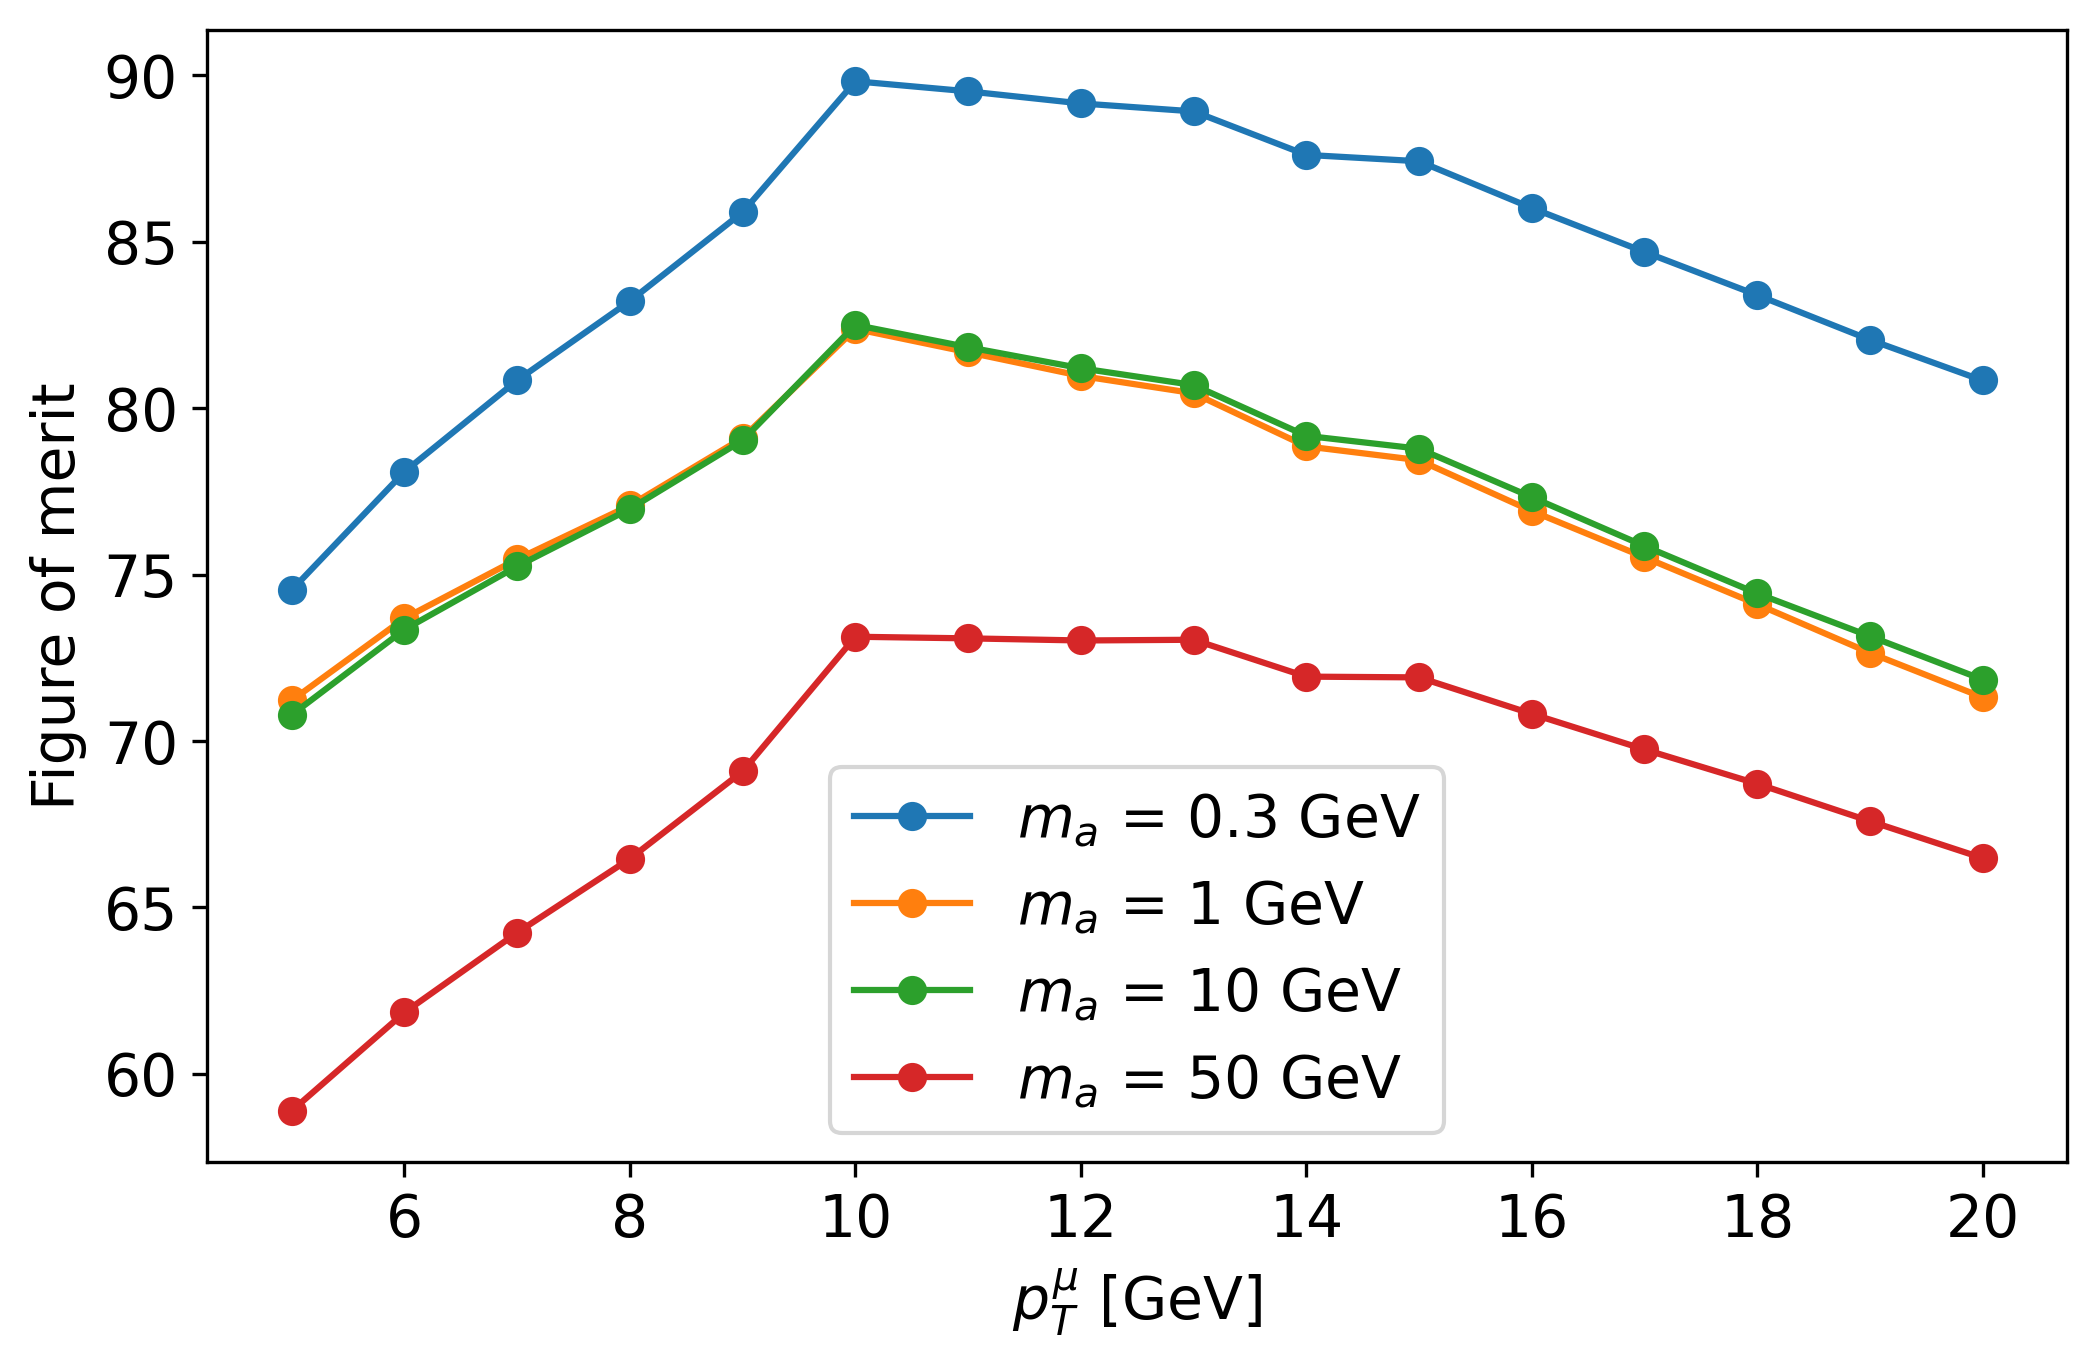

In [12]:
# With only ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_pT)):
    ax.plot(pT_cut,s_pT[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$p_T^{\mu}$ [GeV]")
ax.set_ylabel("Figure of merit")
ax.legend()

# With ttmumu and ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_pT)):
    ax.plot(pT_cut,s_pT_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$p_T^{\mu}$ [GeV]")
ax.set_ylabel("Figure of merit")
ax.legend()

### Muon |eta| cut

In [31]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
data_ttj = data_ttj_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

print("pT cut: ", 10)
sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

s_eta_03 = []
s_eta_1 = []
s_eta_10 = []
s_eta_50 = []
s_eta = [s_eta_03, s_eta_1, s_eta_10, s_eta_50]
s_eta_03_bkg = []
s_eta_1_bkg = []
s_eta_10_bkg = []
s_eta_50_bkg = []
s_eta_bkg = [s_eta_03_bkg, s_eta_1_bkg, s_eta_10_bkg, s_eta_50_bkg]

eta_cut = [2.5,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.6,1.5]

for i in range(len(eta_cut)):
    print("eta cut: ", eta_cut[i])
    sel = ((lambda x: abs(x)<eta_cut[i]),"eta", ["muon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    sel = ((lambda x: abs(x)<eta_cut[i]),"eta", ["antimuon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    print("Signal:")
    print(data_inclusive)
    get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
    print("Background:")
    print(data_bkg)
    get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
    print(data_ttj)
    get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
    for j in range(len(s_eta)):
        s_eta[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],[data_bkg[1]],[cross_bkg[1]],[N_bkg[1]],intlumi))
        s_eta_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlumi))
    print("Figure of merit:   ", s_eta[1][i])

Signal:
Expected number of events:  12702.891096  +-  40.91537959171214
Expected number of events:  13332.842112450002  +-  42.96470632060796
Expected number of events:  13335.993791999997  +-  43.313294265494875
Expected number of events:  9671.034091320002  +-  31.756307805439448
Background:
Expected number of events:  3013.011  +-  9.527977375141589
Expected number of events:  108363.983943255  +-  616.6308129146178
Expected number of events:  203415.37017642  +-  844.8403028838271
[This Dataset contains 707 events.]
Expected number of events:  2480.760827895  +-  93.2986132690755
pT cut:  10
Signal:
Expected number of events:  11527.0928352  +-  38.97581387497638
Expected number of events:  10120.74295245  +-  37.43317605629038
Expected number of events:  10109.893099679999  +-  37.712194529000925
Expected number of events:  8471.018345580002  +-  29.720858963373132
Background:
Expected number of events:  2685.7076150699995  +-  8.995591468597091
Expected number of events:  368.429

Signal:
[This Dataset contains 77277 events., This Dataset contains 64760 events., This Dataset contains 62522 events., This Dataset contains 67336 events.]
Expected number of events:  10184.057632799999  +-  36.63495998113324
Expected number of events:  8966.187138  +-  35.2333857730605
Expected number of events:  8795.28485088  +-  35.17494915716208
Expected number of events:  7021.572841080003  +-  27.058938055782406
Background:
[This Dataset contains 68918 events., This Dataset contains 9 events., This Dataset contains 310 events.]
Expected number of events:  2076.50692098  +-  7.909828186812195
Expected number of events:  31.579699364999996  +-  10.526566455000001
Expected number of events:  1087.74520035  +-  61.7797759184227
[This Dataset contains 707 events.]
Expected number of events:  2480.760827895  +-  93.2986132690755
Figure of merit:    94.4683951588527
eta cut:  1.6
Signal:
[This Dataset contains 74955 events., This Dataset contains 62797 events., This Dataset contains 6

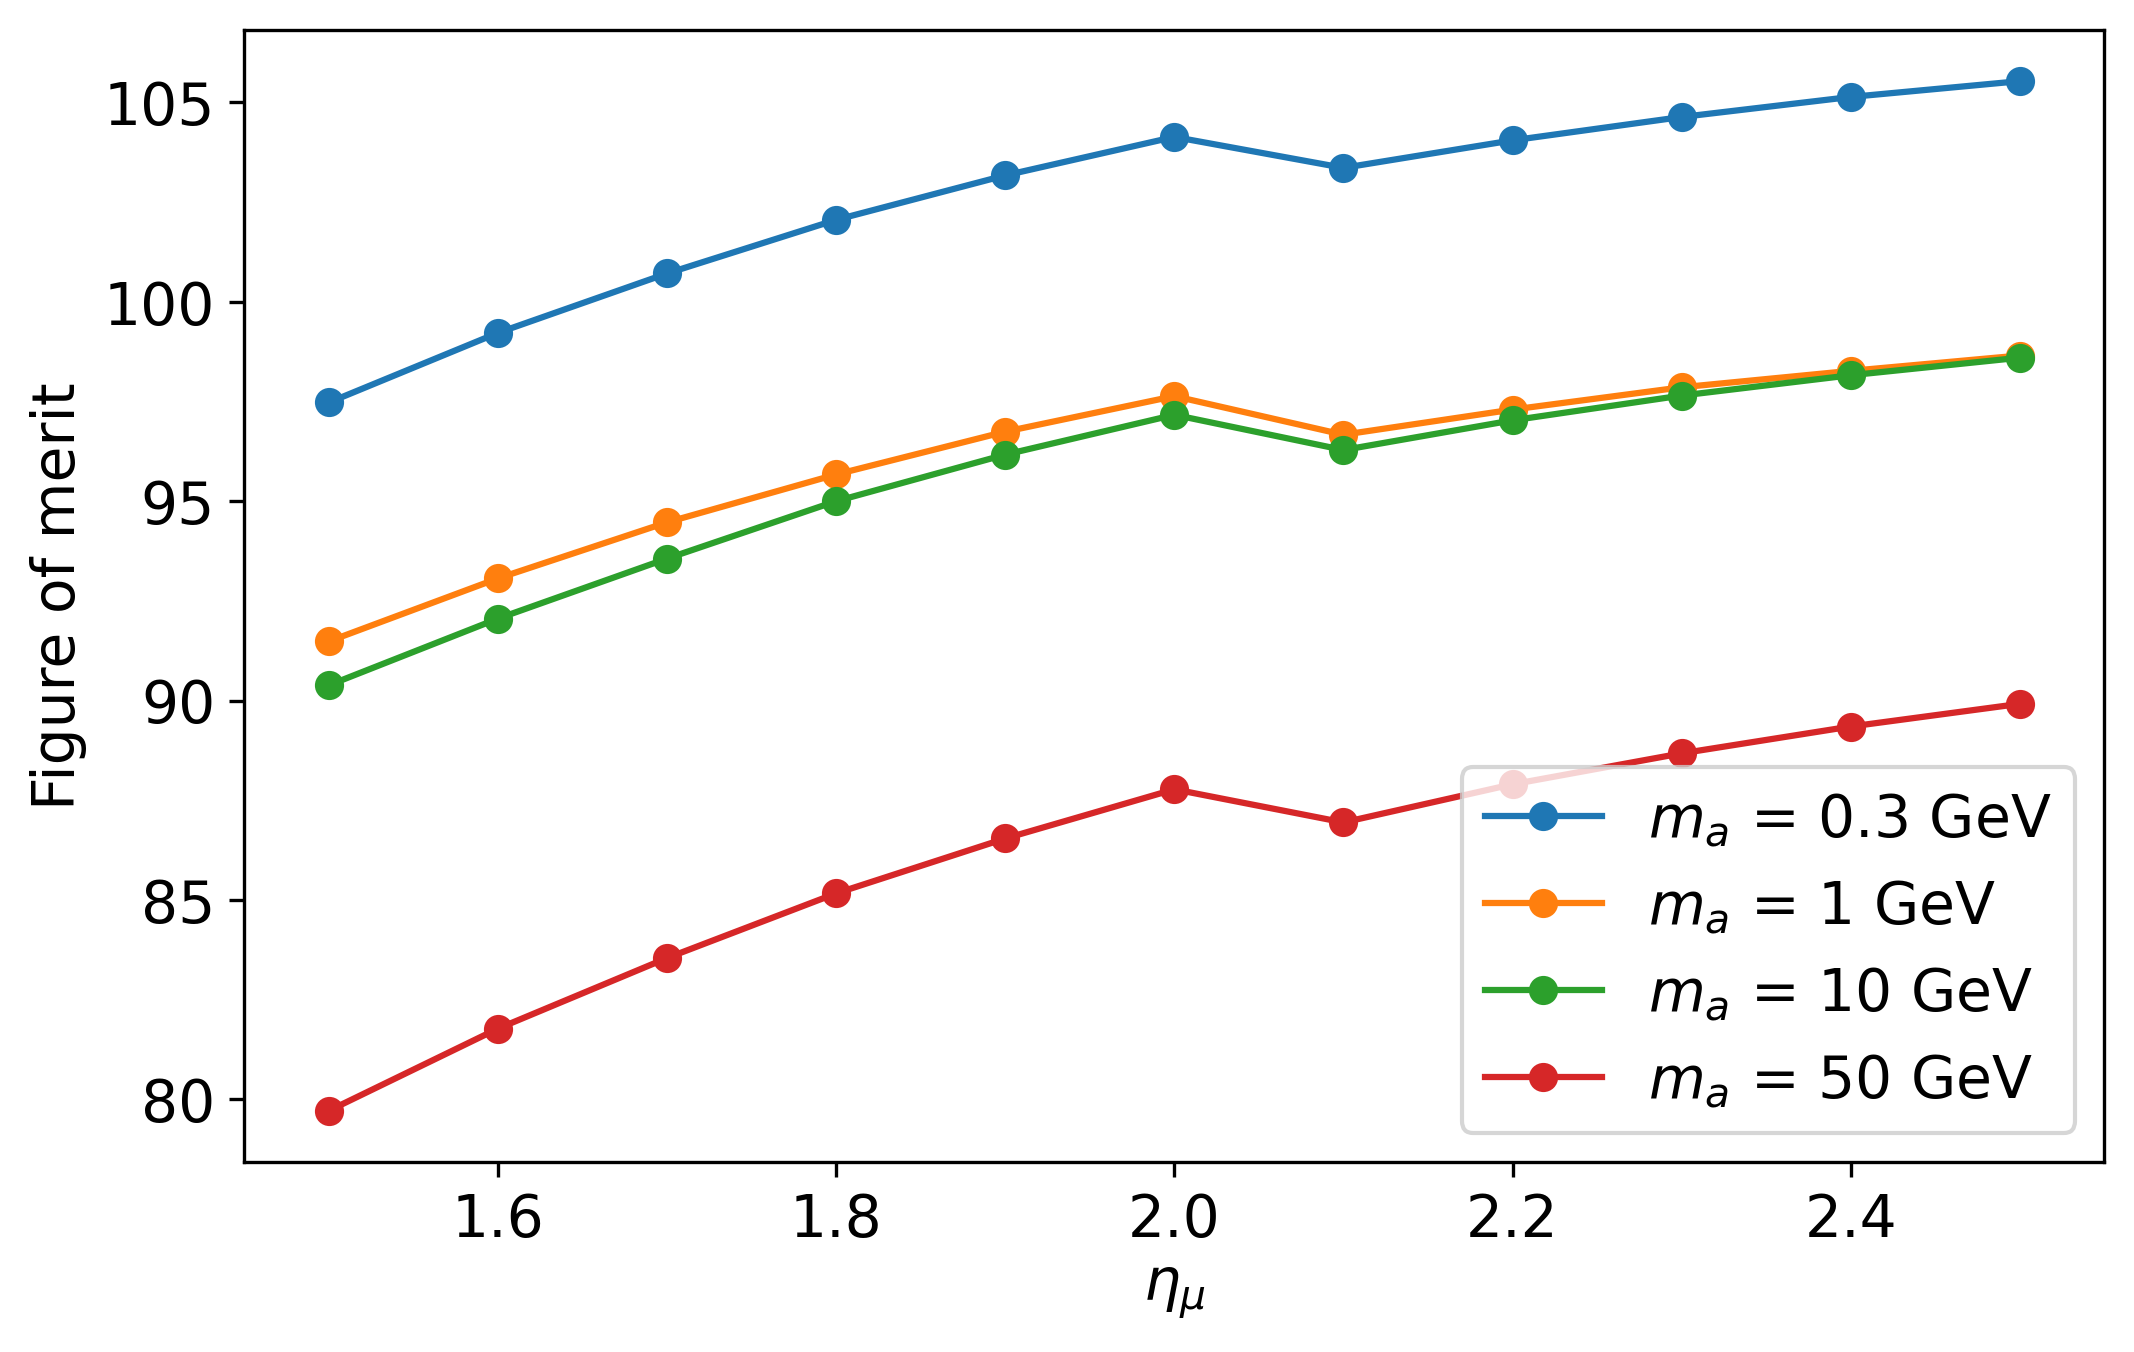

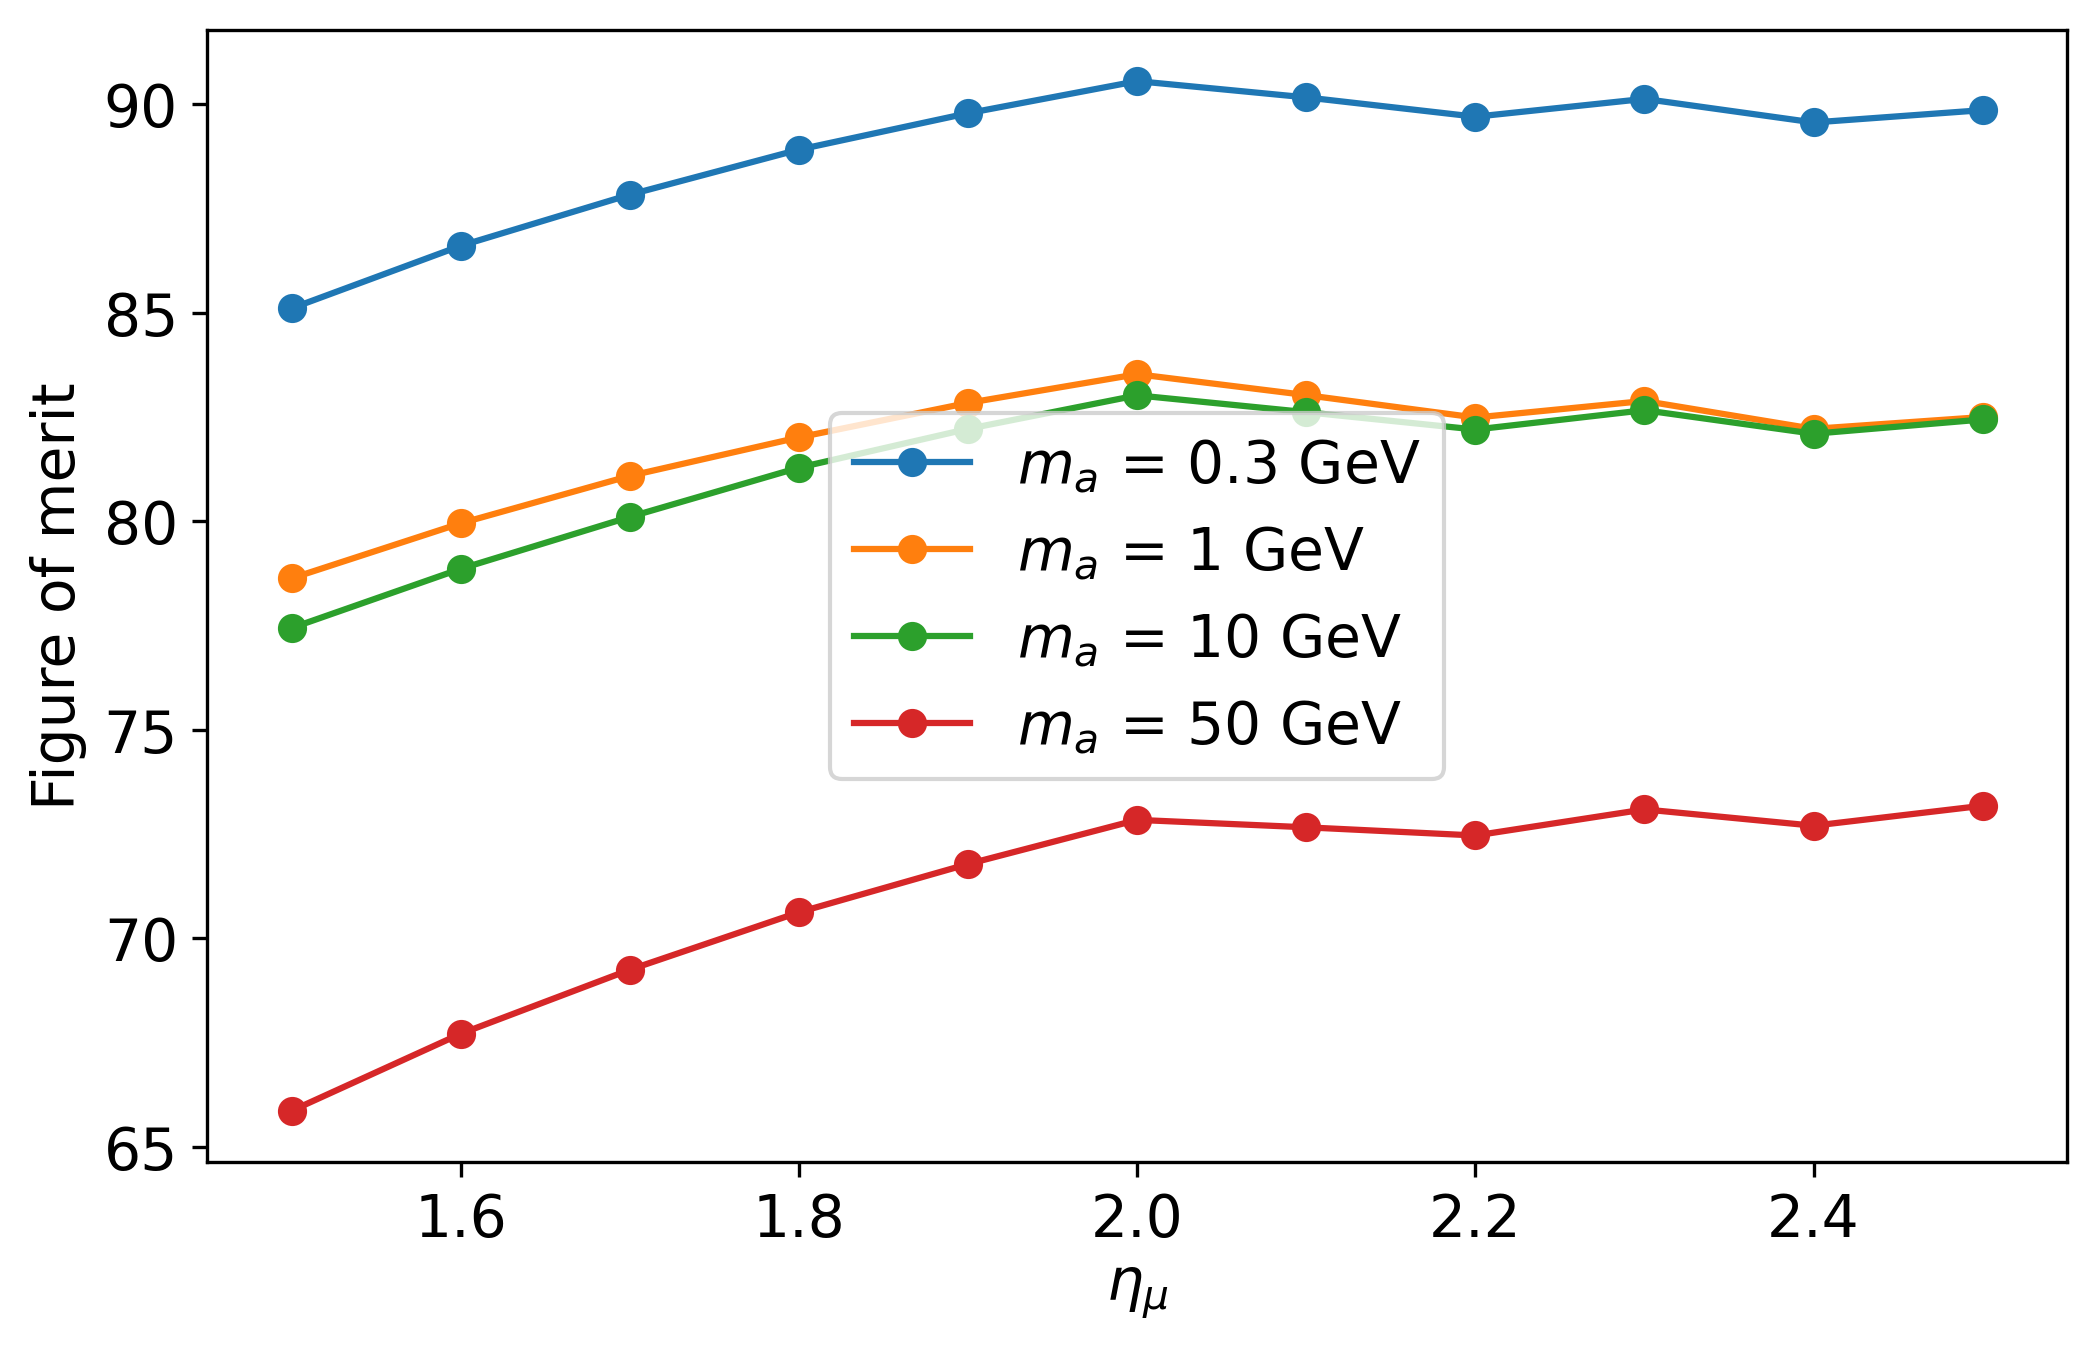

In [32]:
# With only ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_eta)):
    ax.plot(eta_cut,s_eta[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\eta_{\mu}$")
ax.set_ylabel("Figure of merit")
ax.legend()

# With ttmumu and ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_eta)):
    ax.plot(eta_cut,s_eta_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\eta_{\mu}$")
ax.set_ylabel("Figure of merit")
ax.legend()

### Muon DeltaR cut

In [13]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

print("pT cut: ", 10)
sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]

print("Signal:")
print(data_inclusive)
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
print(data_bkg)
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
s = get_figure_of_merit(data_inclusive[0],cross_incl[0],N_incl[0],[data_bkg[1]],[cross_bkg[1]],[N_bkg[1]],intlumi)
print("Figure of merit:   ", s)

s_deltaR_03 = []
s_deltaR_1 = []
s_deltaR_10 = []
s_deltaR_50 = []
s_deltaR = [s_deltaR_03, s_deltaR_1, s_deltaR_10, s_deltaR_50]
s_deltaR_03_bkg = []
s_deltaR_1_bkg = []
s_deltaR_10_bkg = []
s_deltaR_50_bkg = []
s_deltaR_bkg = [s_deltaR_03_bkg, s_deltaR_1_bkg, s_deltaR_10_bkg, s_deltaR_50_bkg]

deltaR_cut = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]

for i in range(len(deltaR_cut)):
    print("delta R cut: ", deltaR_cut[i])
    sel = ((lambda x: x>deltaR_cut[i]),"deltaR", ["muon","antimuon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    print("Signal:")
    print(data_inclusive)
    get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
    print("Background:")
    print(data_bkg)
    get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
    print(data_ttj)
    get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
    for j in range(len(s_deltaR)):
        s_deltaR[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],[data_bkg[1]],[cross_bkg[1]],[N_bkg[1]],intlumi))
        s_deltaR_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlumi))
    print("Figure of merit:   ", s_deltaR[1][i])

Signal:
Expected number of events:  12702.627523199999  +-  40.91495511207905
Expected number of events:  13332.011397150001  +-  42.96336782148811
Expected number of events:  13344.434294399998  +-  43.32699883608477
Expected number of events:  9673.119624420002  +-  31.759731703044572
Background:
Expected number of events:  3013.011  +-  9.527977375141589
Expected number of events:  108363.983943255  +-  616.6308129146178
Expected number of events:  203415.37017642  +-  844.8403028838271
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
pT cut:  10
Signal:
[This Dataset contains 87408 events., This Dataset contains 72936 events., This Dataset contains 71939 events., This Dataset contains 81151 events.]
Expected number of events:  11519.1856512  +-  38.962443556626475
Expected number of events:  10098.175186800001  +-  37.39141753075412
Expected number of events:  10120.021702559998  +-  37.73108079300798
Expected number of event

Signal:
[This Dataset contains 489 events., This Dataset contains 28991 events., This Dataset contains 68130 events., This Dataset contains 80721 events.]
Expected number of events:  64.4435496  +-  2.9142380487883
Expected number of events:  4013.87787705  +-  23.573960792920627
Expected number of events:  9584.190475199997  +-  36.718610791618715
Expected number of events:  8417.315868255002  +-  29.626500684691948
Background:
[This Dataset contains 88952 events., This Dataset contains 6 events., This Dataset contains 508 events.]
Expected number of events:  2680.13354472  +-  8.986251638870542
Expected number of events:  21.053132910000002  +-  8.594905519415994
Expected number of events:  1782.49858638  +-  79.08558618246569
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
Figure of merit:    63.1224779669208
delta R cut:  0.9
Signal:
[This Dataset contains 205 events., This Dataset contains 25102 events., This Dataset contai

Figure of mertit after DeltaR >  0.2 :
0.3 :   53.75105911609024
1 :   90.7196816141268
10 :   98.22289999972287
50 :   89.86717448438256


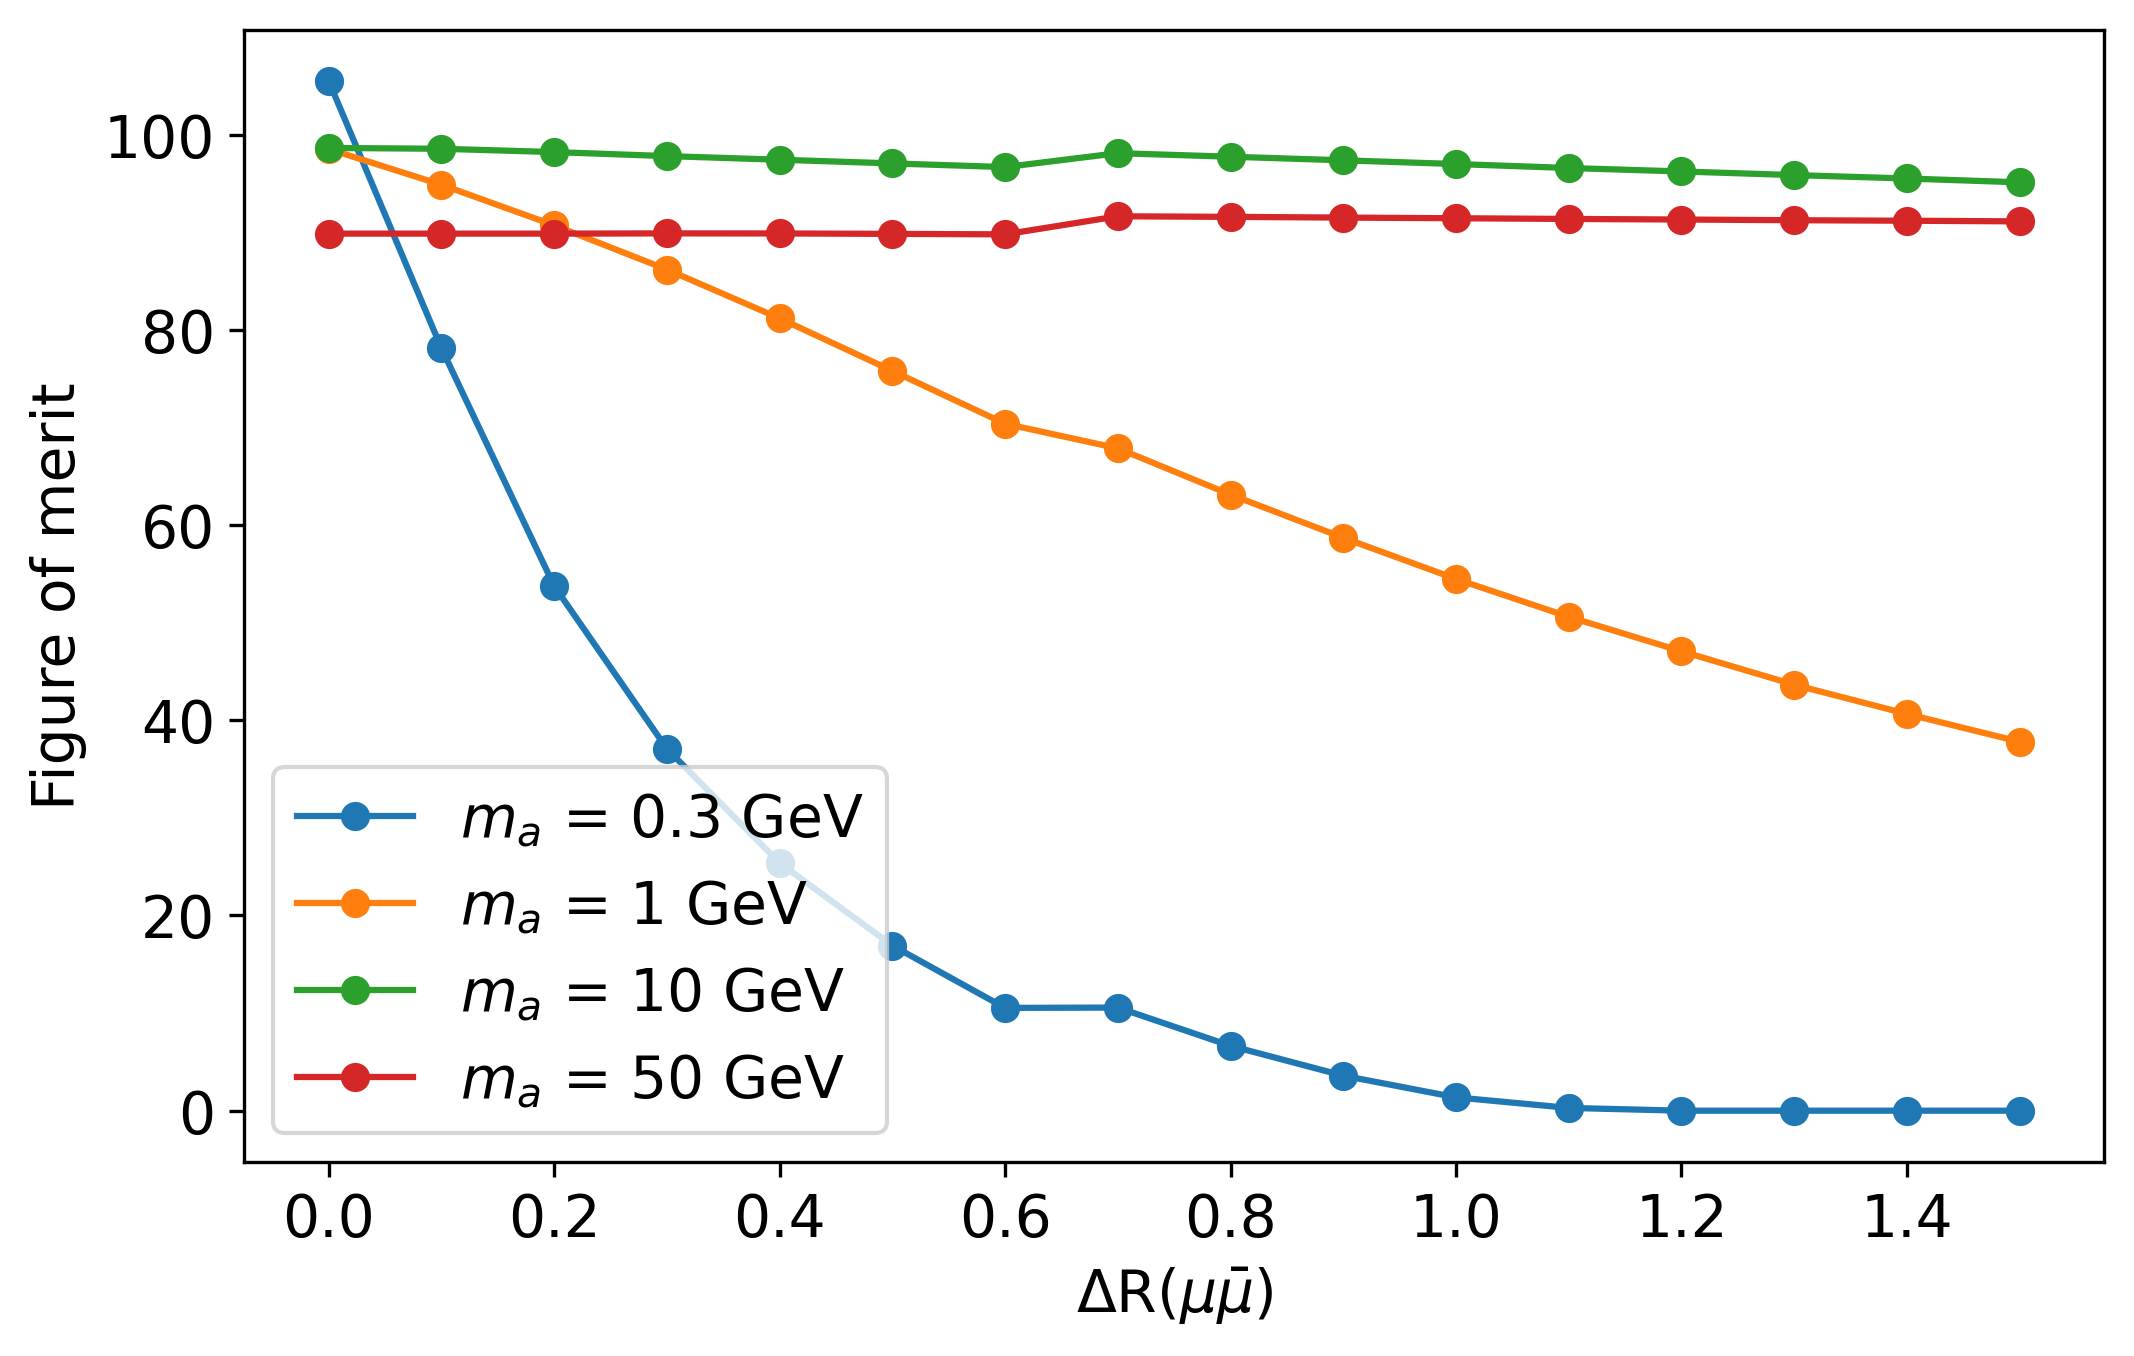

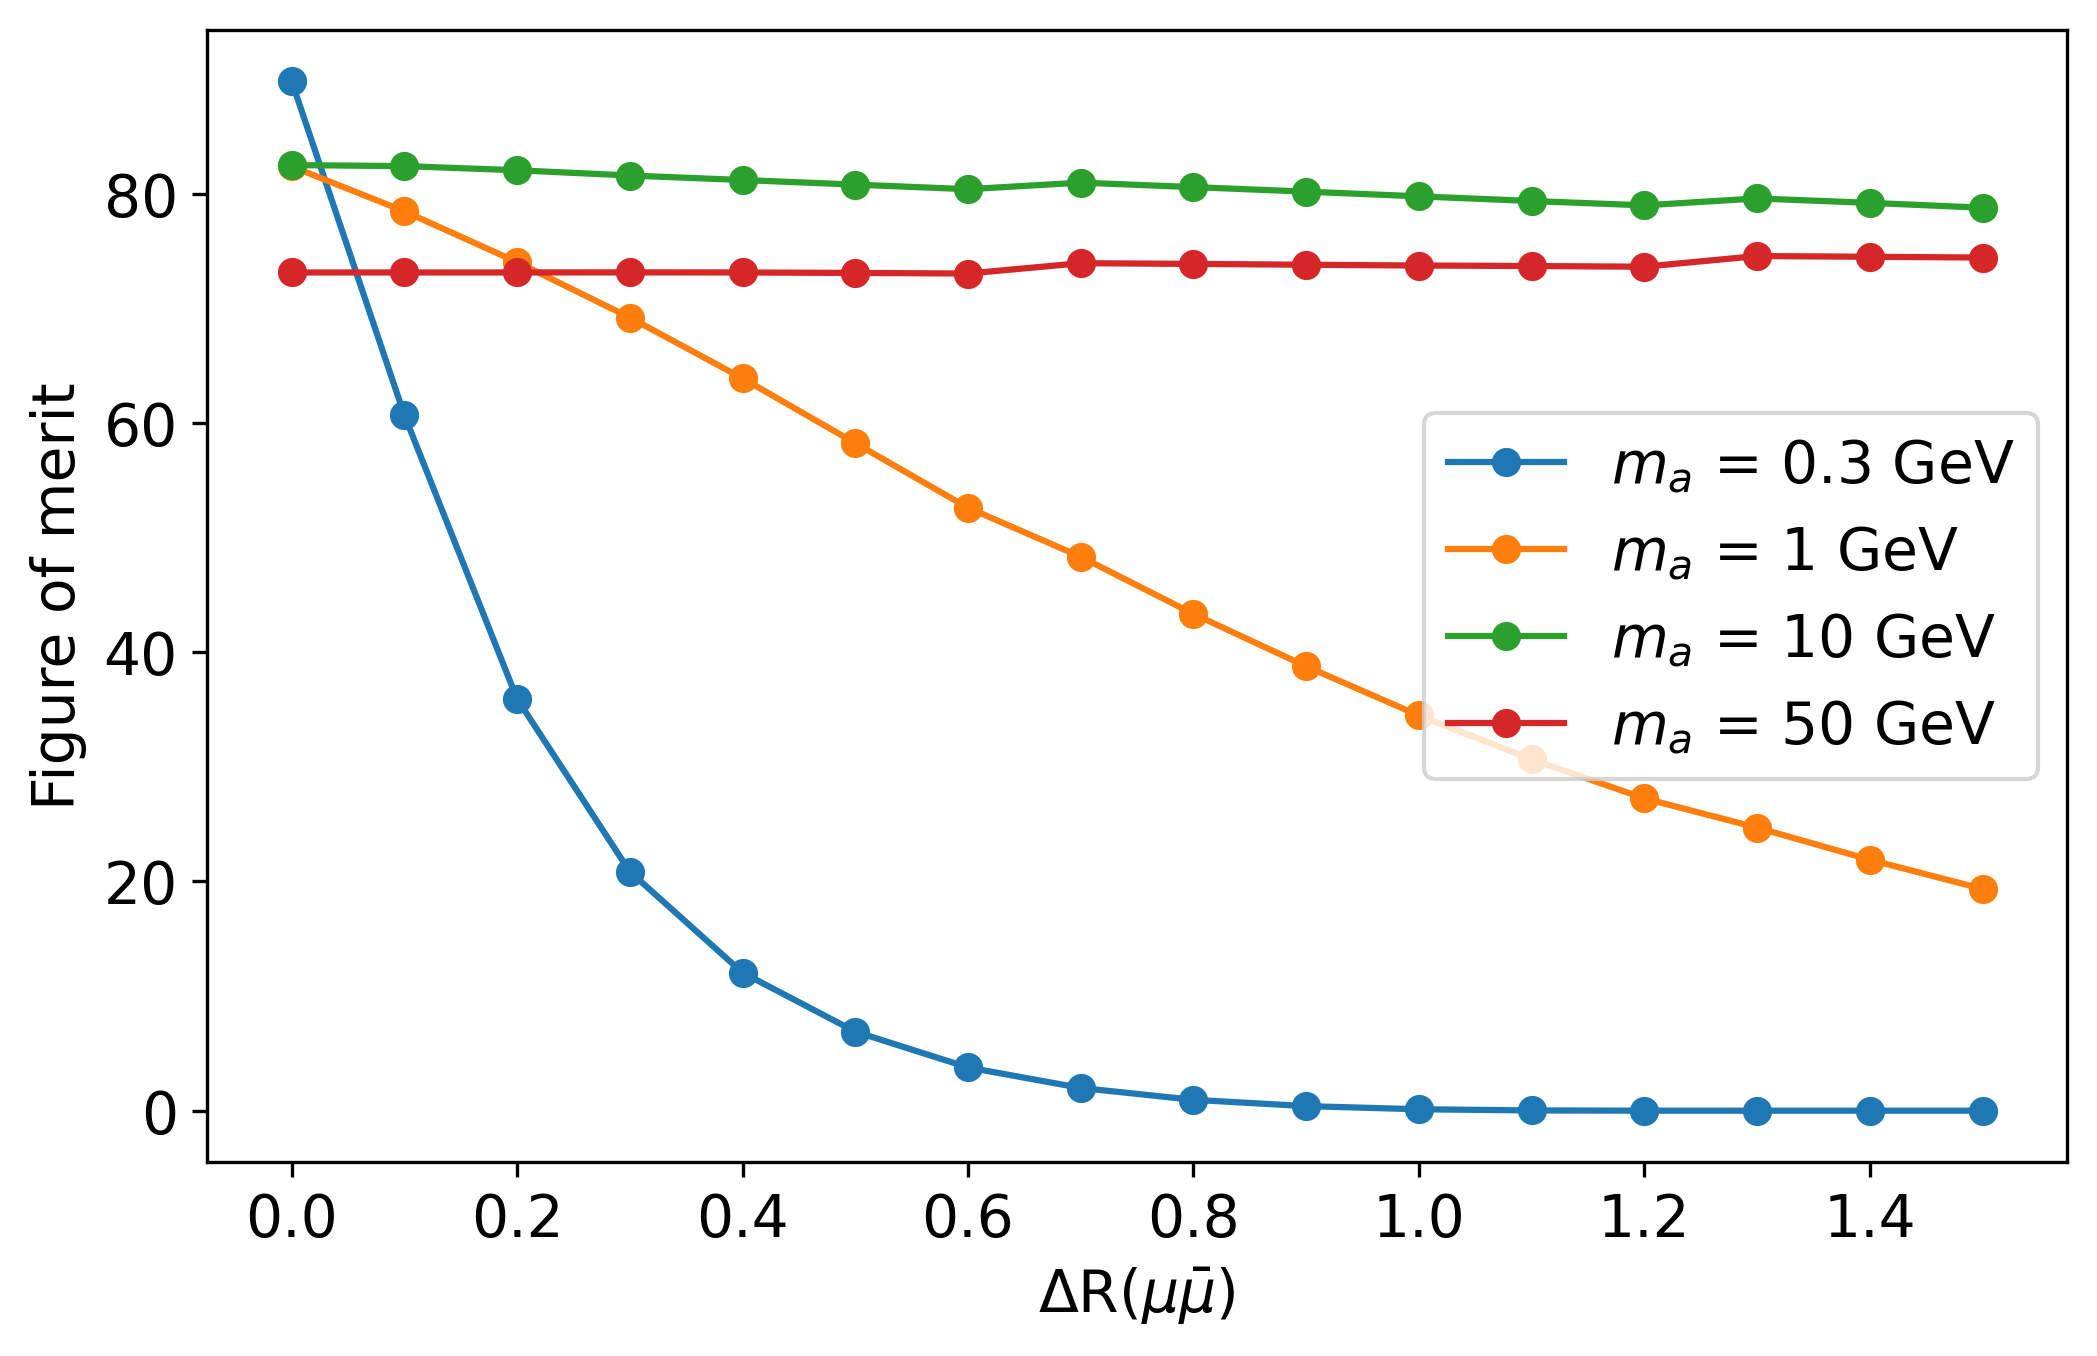

In [16]:
print("Figure of mertit after DeltaR > ", deltaR_cut[2], ":")
for i in range(len(s_deltaR)):
    print(str(masses[i]), ":  ", s_deltaR[i][2])

# With only ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_deltaR)):
    ax.plot(deltaR_cut,s_deltaR[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\Delta$R($\mu\bar{\mu}$)")
ax.set_ylabel("Figure of merit")
ax.legend()

# With ttmumu and ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_deltaR)):
    ax.plot(deltaR_cut,s_deltaR_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\Delta$R($\mu\bar{\mu}$)")
ax.set_ylabel("Figure of merit")
ax.legend()

In [ ]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

print("pT cut: ", 10)
sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]

print("eta cut: ", 2.0)
sel = ((lambda x: abs(x)<2.0),"eta", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
sel = ((lambda x: abs(x)<10),"eta", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]

print(data_inclusive)
print(data_bkg)
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
s = get_figure_of_merit(data_inclusive[0],cross_incl[0],N_incl[0],[data_bkg[1]],[cross_bkg[1]],[N_bkg[1]],intlumi)
print("Figure of merit:   ", s)

s_deltaR2_03 = []
s_deltaR2_1 = []
s_deltaR2_10 = []
s_deltaR2_50 = []
s_deltaR2 = [s_deltaR2_03, s_deltaR2_1, s_deltaR2_10, s_deltaR2_50]
s_deltaR2_03_bkg = []
s_deltaR2_1_bkg = []
s_deltaR2_10_bkg = []
s_deltaR2_50_bkg = []
s_deltaR2_bkg = [s_deltaR2_03_bkg, s_deltaR2_1_bkg, s_deltaR2_10_bkg, s_deltaR2_50_bkg]

deltaR_cut = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]

for i in range(len(deltaR_cut)):
    print("delta R cut: ", deltaR_cut[i])
    sel = ((lambda x: x>deltaR_cut[i]),"deltaR", ["muon","antimuon"])
    data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
    data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
    print("Signal:")
    print(data_inclusive)
    get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
    print("Background:")
    print(data_bkg)
    get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
    print(data_ttj)
    get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)
    for j in range(len(s_deltaR2)):
        s_deltaR2[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_ttj,cross_ttj,N_ttj,intlumi))
        s_deltaR2_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlumi))
    print("Figure of merit:   ", s_deltaR2[1][i])

In [ ]:
# With only ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_eta)):
    ax.plot(deltaR_cut,s_deltaR2[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\Delta$R($\mu\bar{\mu}$)")
ax.set_ylabel("Figure of merit")
ax.legend()

# With ttmumu and ttj background
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_eta)):
    ax.plot(deltaR_cut,s_deltaR2_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\Delta$R($\mu\bar{\mu}$)")
ax.set_ylabel("Figure of merit")
ax.legend()

# Figure of merit depending on integrated luminosity

In [25]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
data_ttj = data_ttj_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

print("pT cut: ", 10)
sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]

s_intlum_03 = []
s_intlum_1 = []
s_intlum_10 = []
s_intlum_50 = []
s_intlum = [s_intlum_03, s_intlum_1, s_intlum_10, s_intlum_50]
s_intlum_03_bkg = []
s_intlum_1_bkg = []
s_intlum_10_bkg = []
s_intlum_50_bkg = []
s_intlum_bkg = [s_intlum_03_bkg, s_intlum_1_bkg, s_intlum_10_bkg, s_intlum_50_bkg]

intlum_fb = [150,200,250,300,350,400,500]
intlum = []
for il in intlum_fb:
    intlum.append(il*1000)

for i in range(len(intlum)):
    get_expected_events(data_inclusive, cross_incl, intlum[i], N_incl)
    get_expected_events(data_bkg, cross_bkg, intlum[i], N_bkg)
    get_expected_events(data_ttj, cross_ttj, intlum[i], N_ttj)
    
    for j in range(len(s_pT)):
        s_intlum[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_ttj,cross_ttj,N_ttj,intlum[i]))
        s_intlum_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlum[i]))
    print("Figure of merit:   ", s_intlum[1][i])

Signal:
Expected number of events:  12702.891096  +-  40.91537959171214
Expected number of events:  13332.842112450002  +-  42.96470632060796
Expected number of events:  13335.993791999997  +-  43.313294265494875
Expected number of events:  9671.034091320002  +-  31.756307805439448
Background:
Expected number of events:  3013.011  +-  9.527977375141589
Expected number of events:  108363.983943255  +-  616.6308129146178
Expected number of events:  203415.37017642  +-  844.8403028838271
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
pT cut:  10
Expected number of events:  11527.0928352  +-  38.97581387497638
Expected number of events:  10120.74295245  +-  37.43317605629038
Expected number of events:  10109.893099679999  +-  37.712194529000925
Expected number of events:  8471.018345580002  +-  29.720858963373132
Expected number of events:  2685.7076150699995  +-  8.995591468597091
Expected number of events:  368.429825925  +-  35.

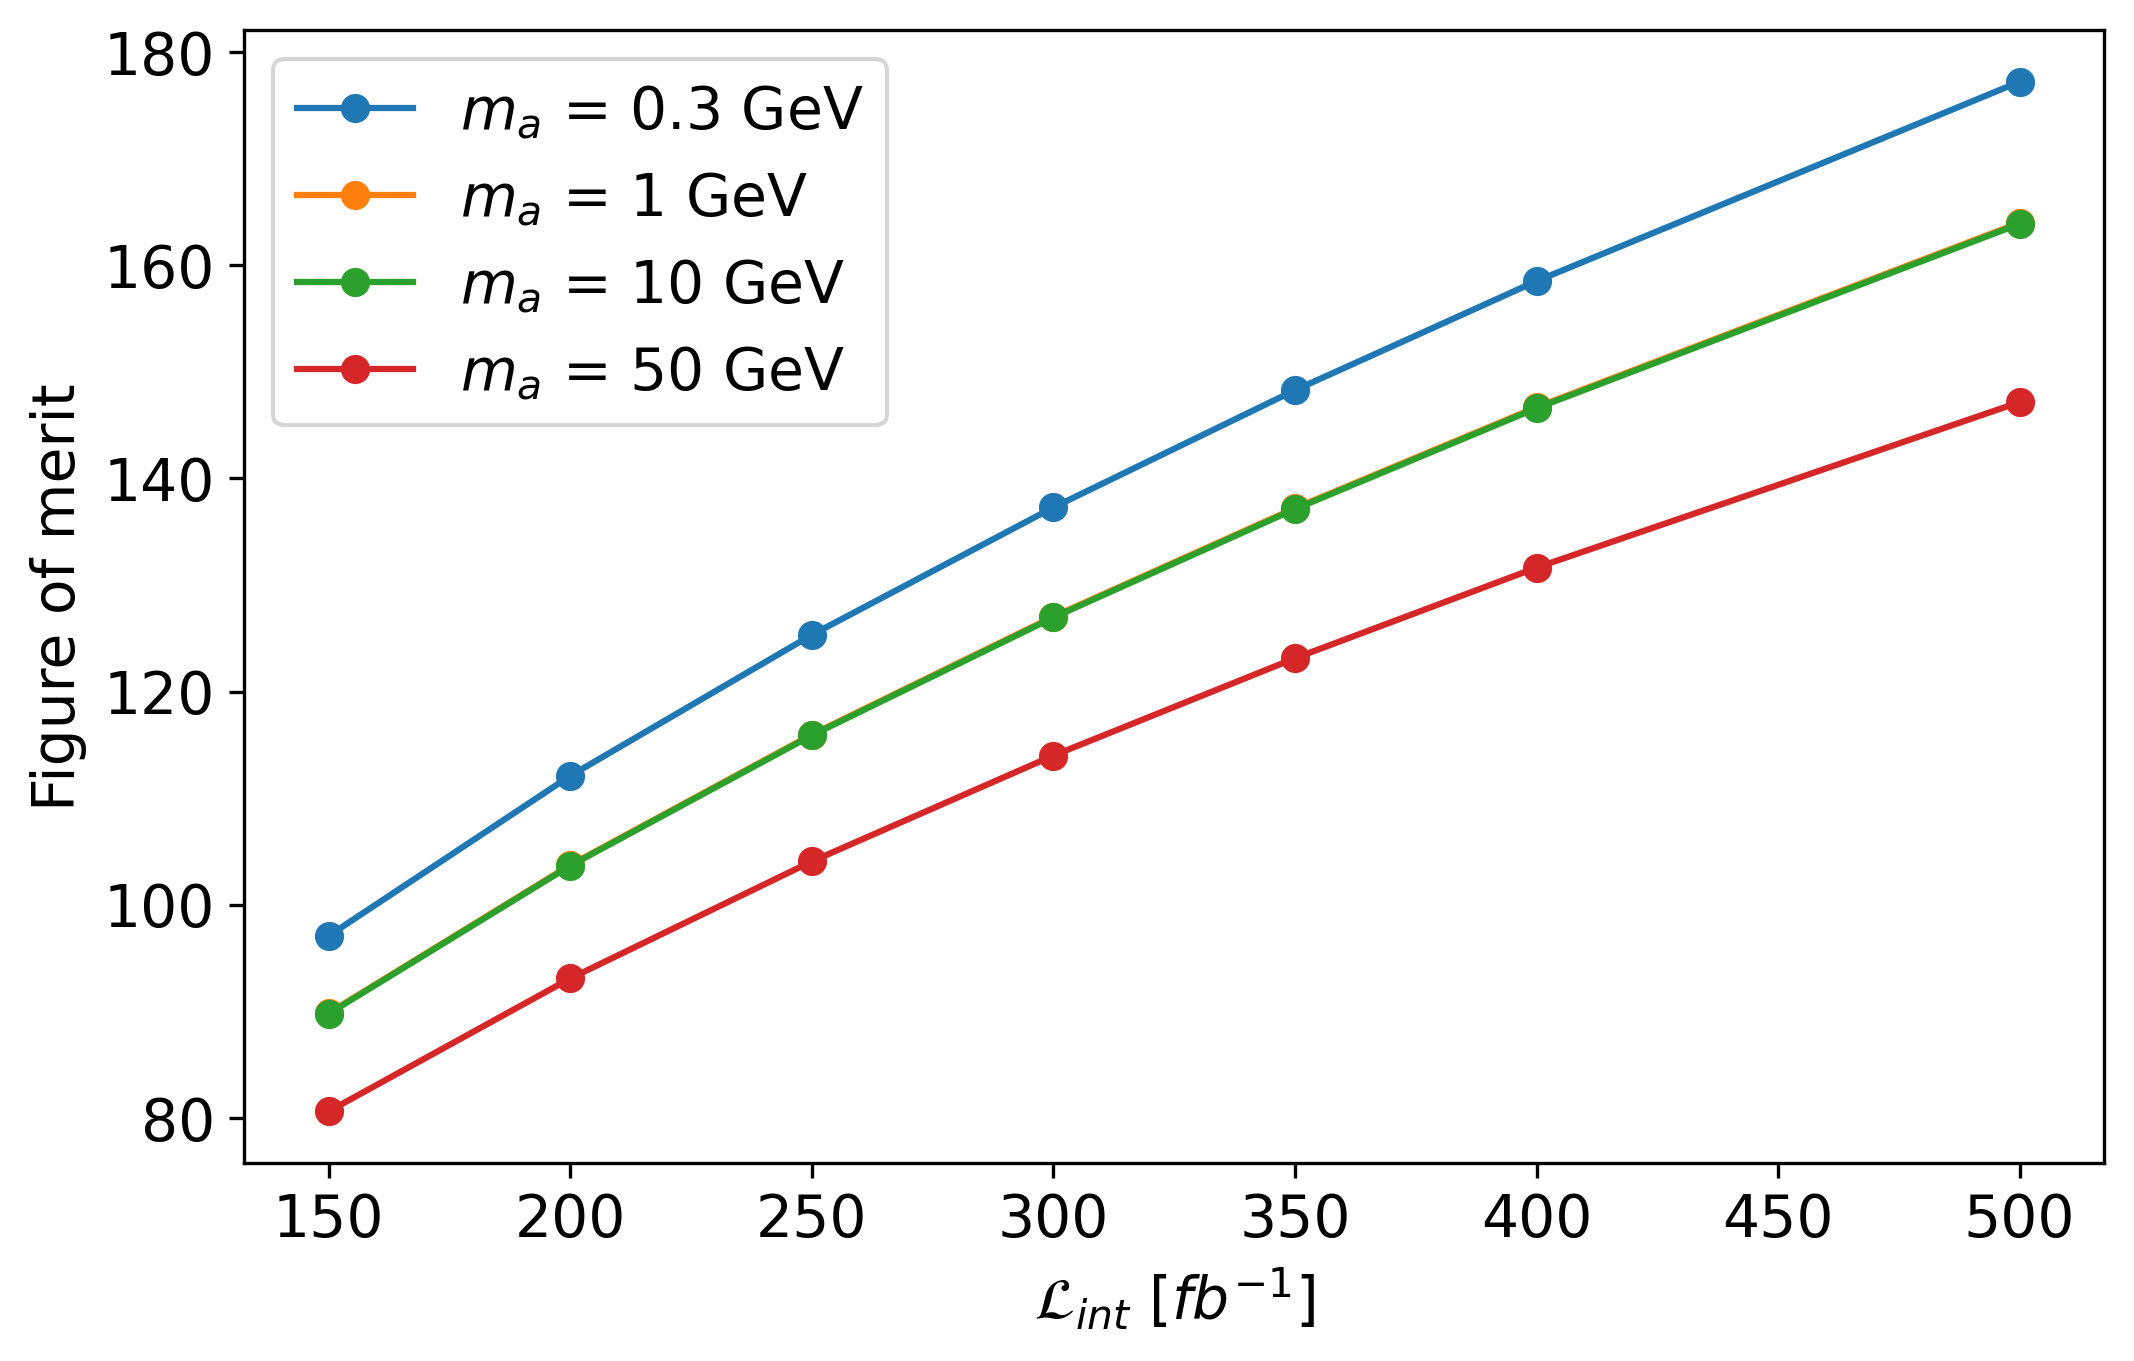

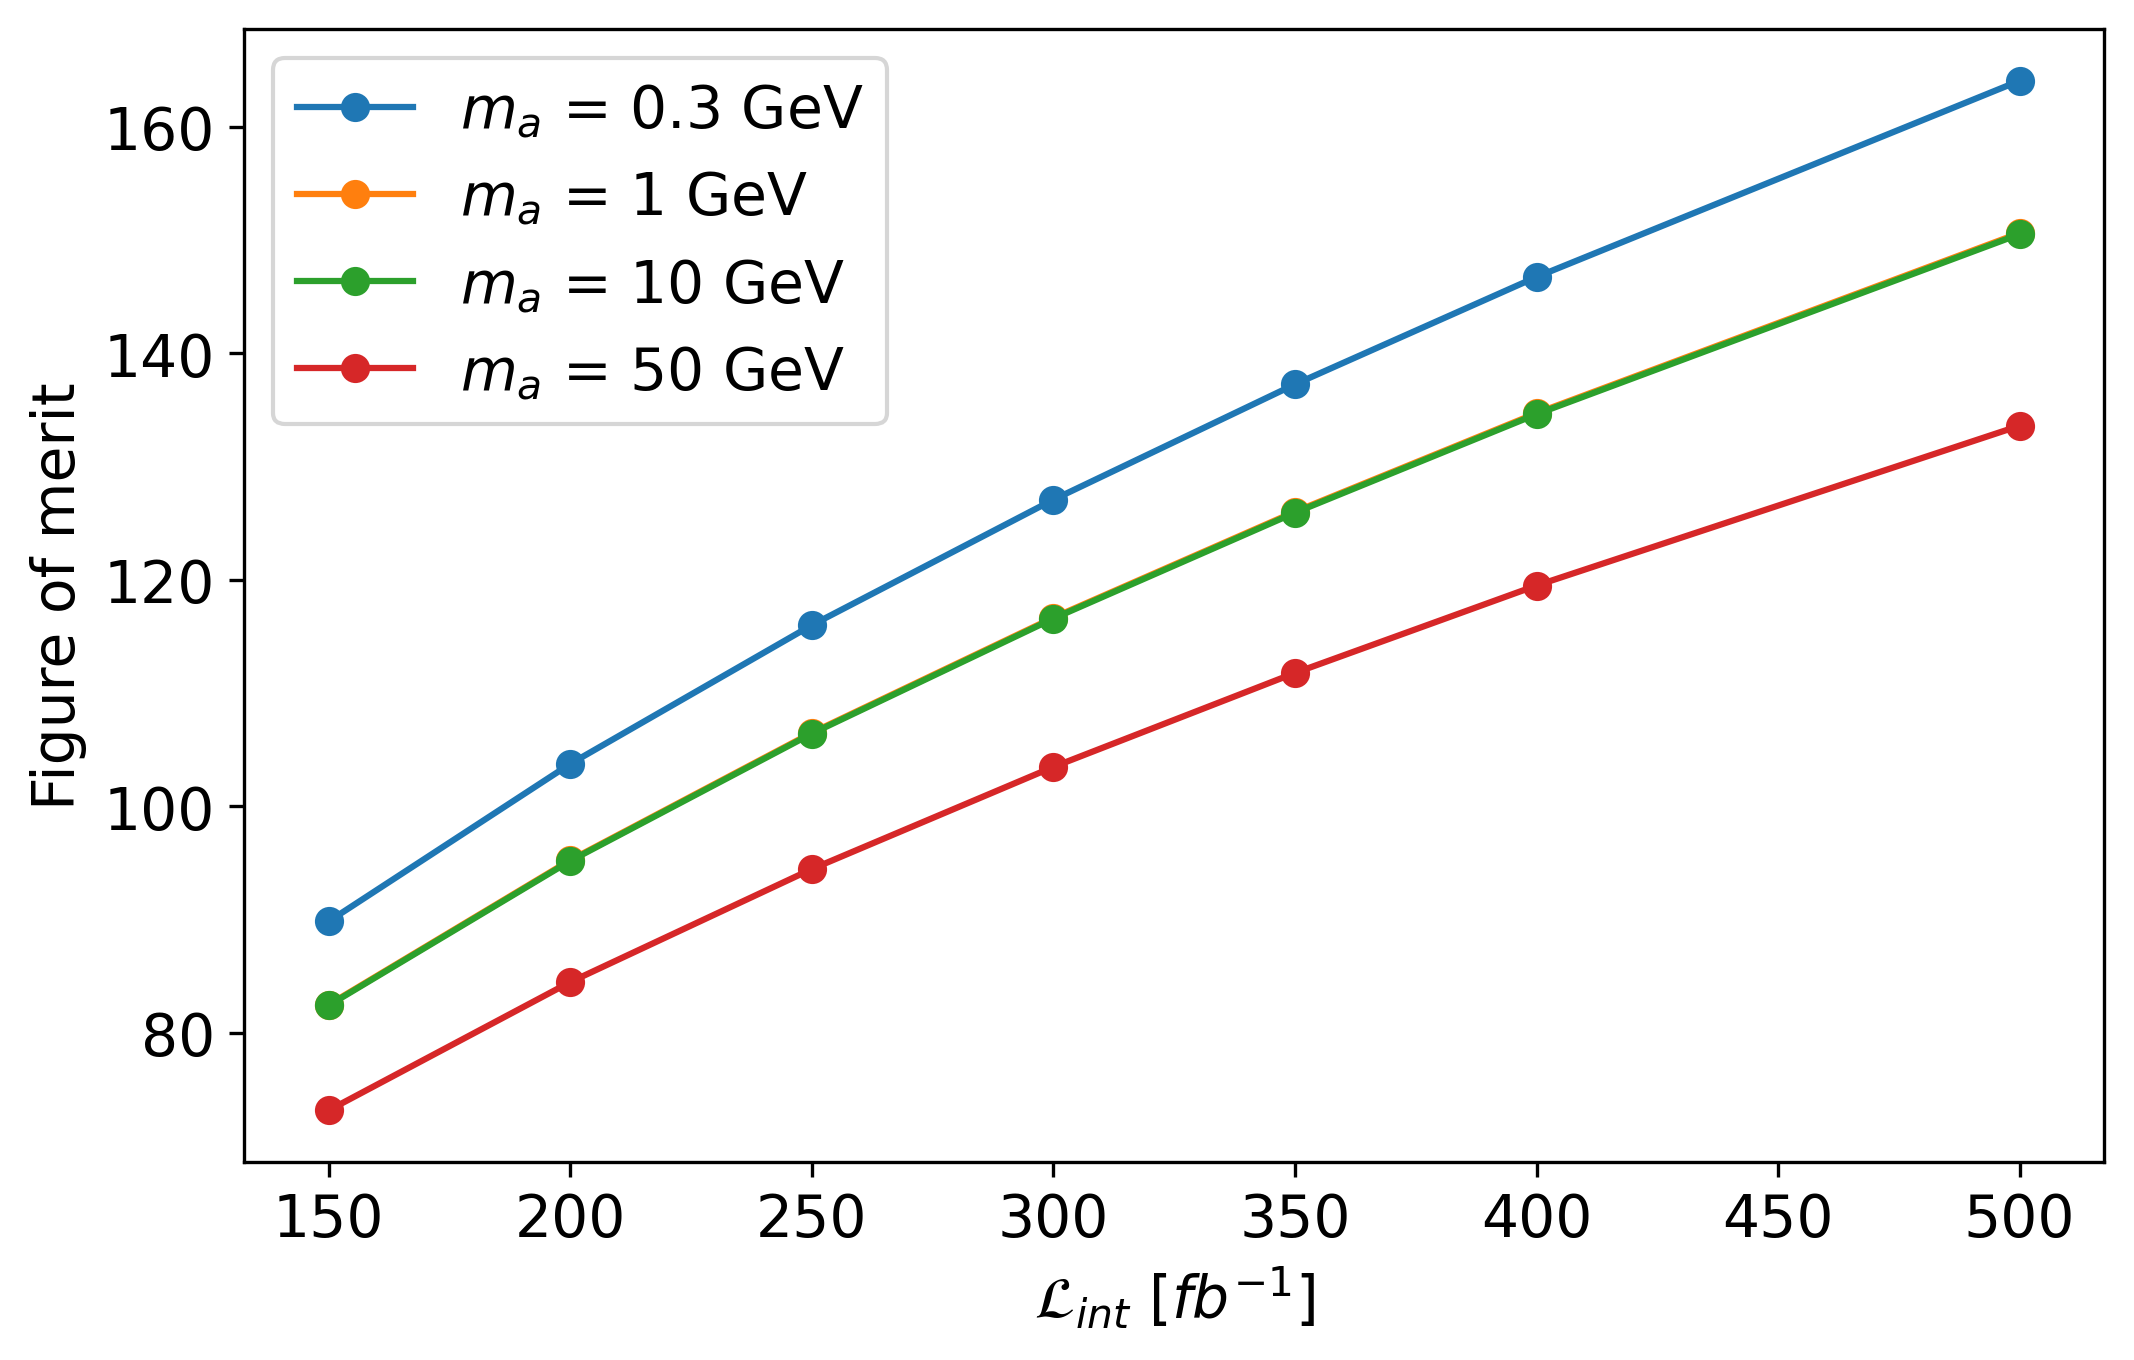

In [26]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_intlum)):
    ax.plot(intlum_fb,s_intlum[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\mathcal{L}_{int}$ [$fb^{-1}$]")
ax.set_ylabel("Figure of merit")
ax.legend()

fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_intlum)):
    ax.plot(intlum_fb,s_intlum_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\mathcal{L}_{int}$ [$fb^{-1}$]")
ax.set_ylabel("Figure of merit")
ax.legend()

In [28]:
#Resetting the data
data_inclusive = data_inclusive_org
data_bkg = data_bkg_org + data_ttj_pair_org + data_ttj_nonpair_org
data_ttj = data_ttj_org
cross_incl = cross_incl_org
cross_bkg = cross_bkg_org.copy()
cross_bkg += cross_ttj
N_incl = N_incl_org.copy()
N_bkg = N_bkg_org.copy()
N_bkg += N_ttj_org
N_ttj = N_ttj_org
masses = masses_org
print("Signal:")
get_expected_events(data_inclusive, cross_incl, intlumi, N_incl)
print("Background:")
get_expected_events(data_bkg, cross_bkg, intlumi, N_bkg)
print(data_ttj)
get_expected_events(data_ttj, cross_ttj, intlumi, N_ttj)

print("pT cut: ", 10)
sel = ((lambda x: x>10),"pT", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]
sel = ((lambda x: x>10),"pT", ["antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]

print("deltaR cut: ", 0.2)
sel = ((lambda x: x>0.2),"deltaR", ["muon","antimuon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg]
data_ttj = [dc.Dataset.event_selection(ds,sel) for ds in data_ttj]

s_intlum_03 = []
s_intlum_1 = []
s_intlum_10 = []
s_intlum_50 = []
s_intlum = [s_intlum_03, s_intlum_1, s_intlum_10, s_intlum_50]
s_intlum_03_bkg = []
s_intlum_1_bkg = []
s_intlum_10_bkg = []
s_intlum_50_bkg = []
s_intlum_bkg = [s_intlum_03_bkg, s_intlum_1_bkg, s_intlum_10_bkg, s_intlum_50_bkg]

intlum_fb = [150,200,250,300,350,400,500]
intlum = []
for il in intlum_fb:
    intlum.append(il*1000)

for i in range(len(intlum)):
    get_expected_events(data_inclusive, cross_incl, intlum[i], N_incl)
    get_expected_events(data_bkg, cross_bkg, intlum[i], N_bkg)
    get_expected_events(data_ttj, cross_ttj, intlum[i], N_ttj)
    
    for j in range(len(s_intlum)):
        s_intlum[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_ttj,cross_ttj,N_ttj,intlum[i]))
        s_intlum_bkg[j].append(get_figure_of_merit(data_inclusive[j],cross_incl[j],N_incl[j],data_bkg,cross_bkg,N_bkg,intlum[i]))
    print("Figure of merit:   ", s_intlum[1][i])

Signal:
Expected number of events:  12702.891096  +-  40.91537959171214
Expected number of events:  13332.842112450002  +-  42.96470632060796
Expected number of events:  13335.993791999997  +-  43.313294265494875
Expected number of events:  9671.034091320002  +-  31.756307805439448
Background:
Expected number of events:  3013.011  +-  9.527977375141589
Expected number of events:  108363.983943255  +-  616.6308129146178
Expected number of events:  203415.37017642  +-  844.8403028838271
[This Dataset contains 87671 events.]
Expected number of events:  307624.869225435  +-  1038.947164057959
pT cut:  10
deltaR cut:  0.2
Expected number of events:  3248.53476  +-  20.690884497654128
Expected number of events:  8629.747441500002  +-  34.56603157916238
Expected number of events:  10031.115077279997  +-  37.56497723599692
Expected number of events:  8470.705515615002  +-  29.720310170965288
Expected number of events:  2685.7076150699995  +-  8.995591468597091
Expected number of events:  368.4

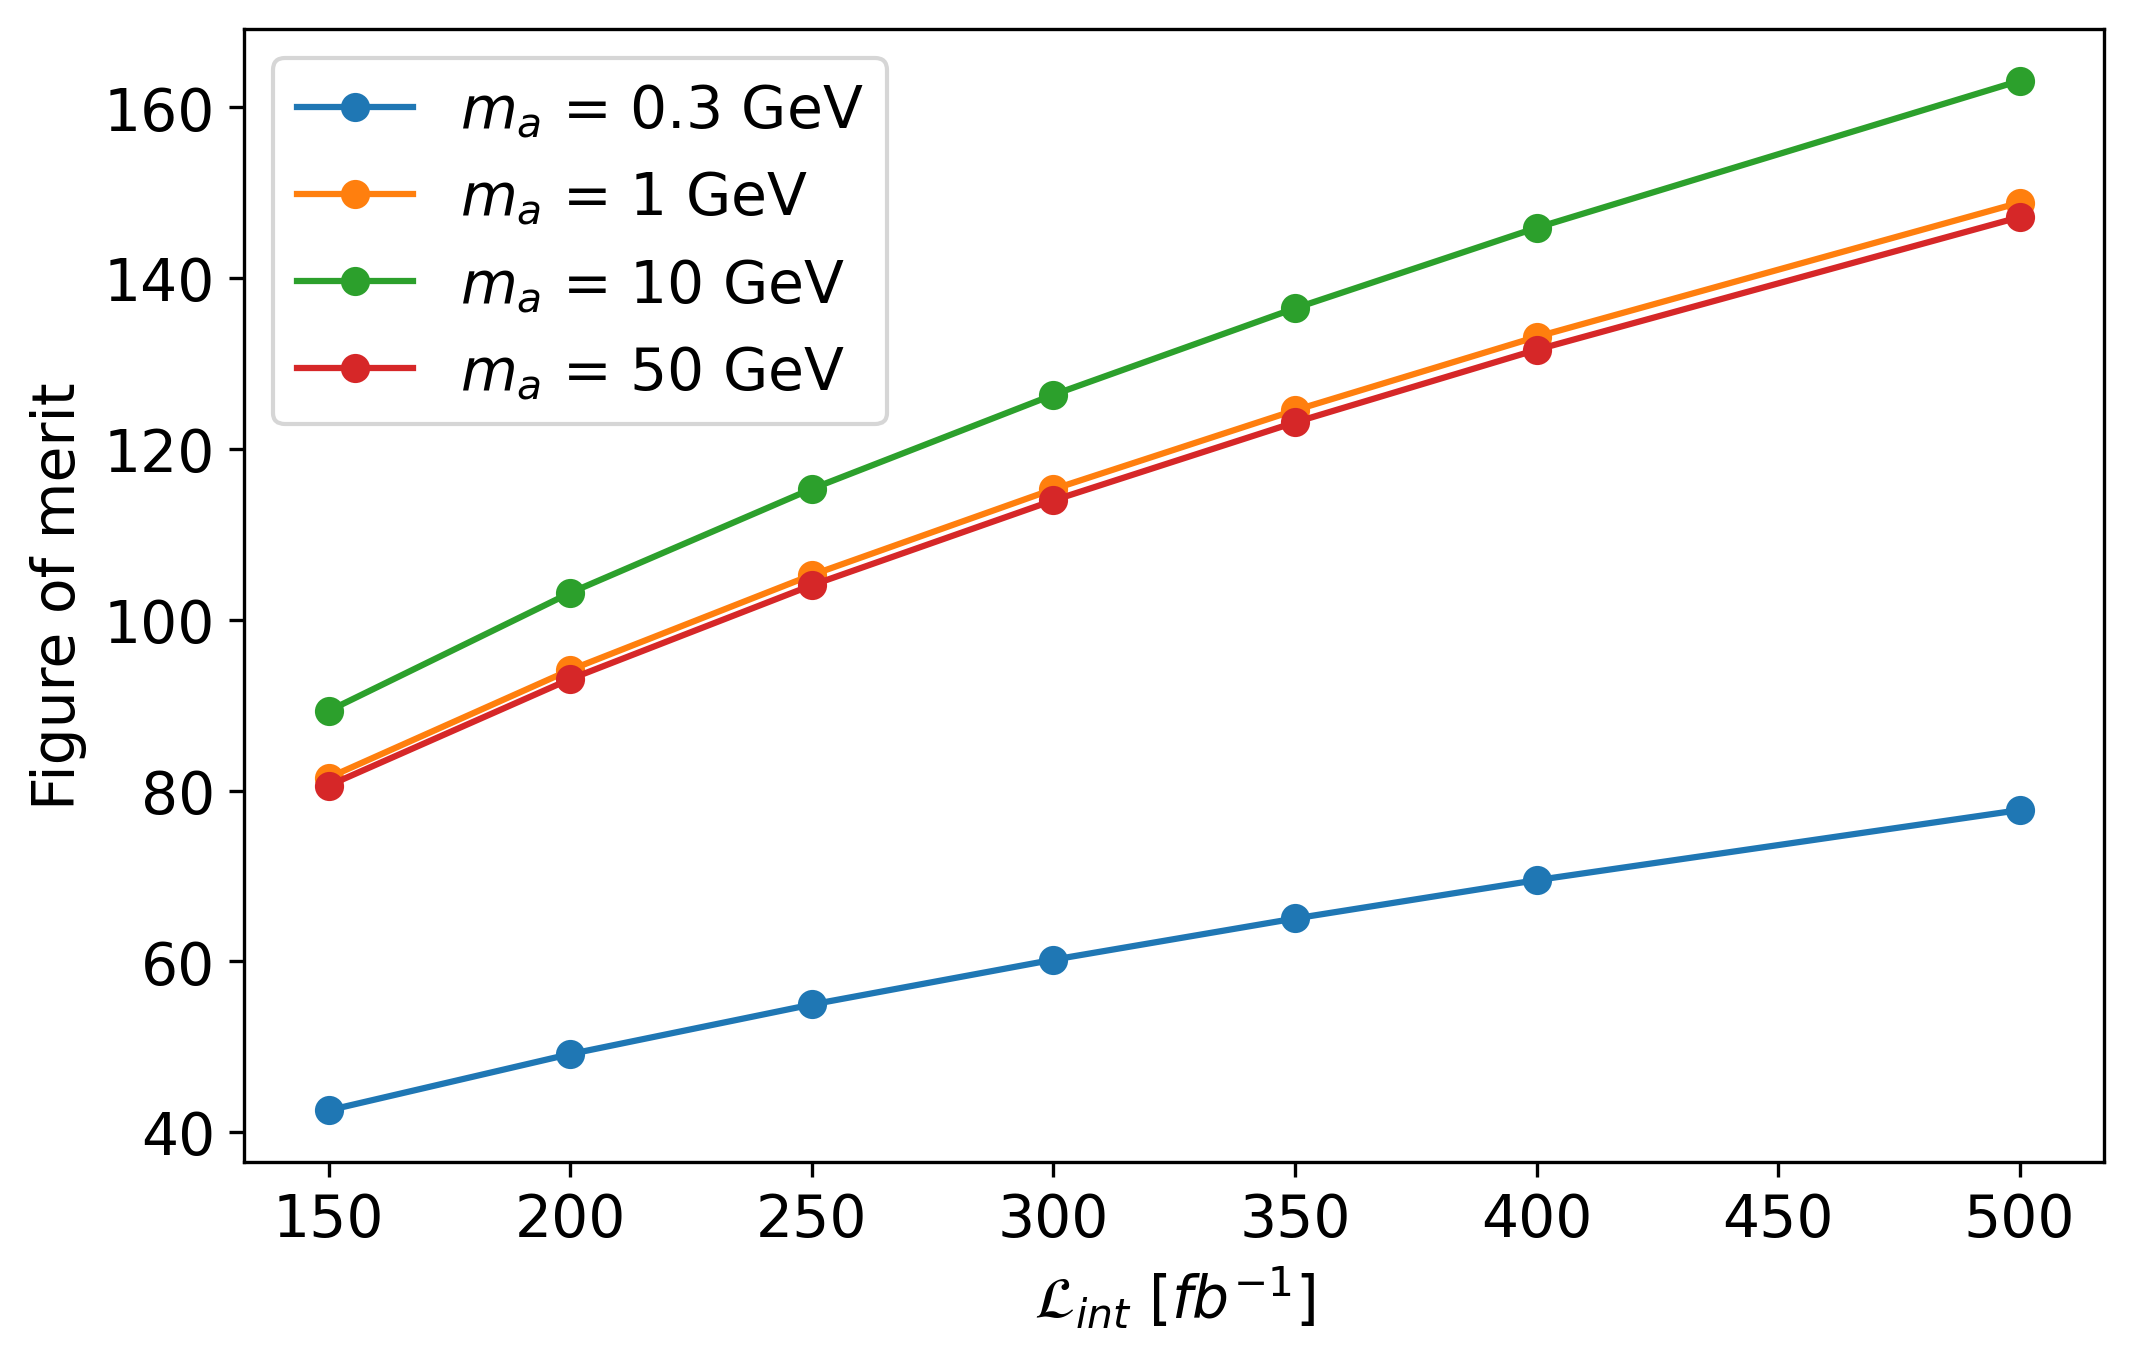

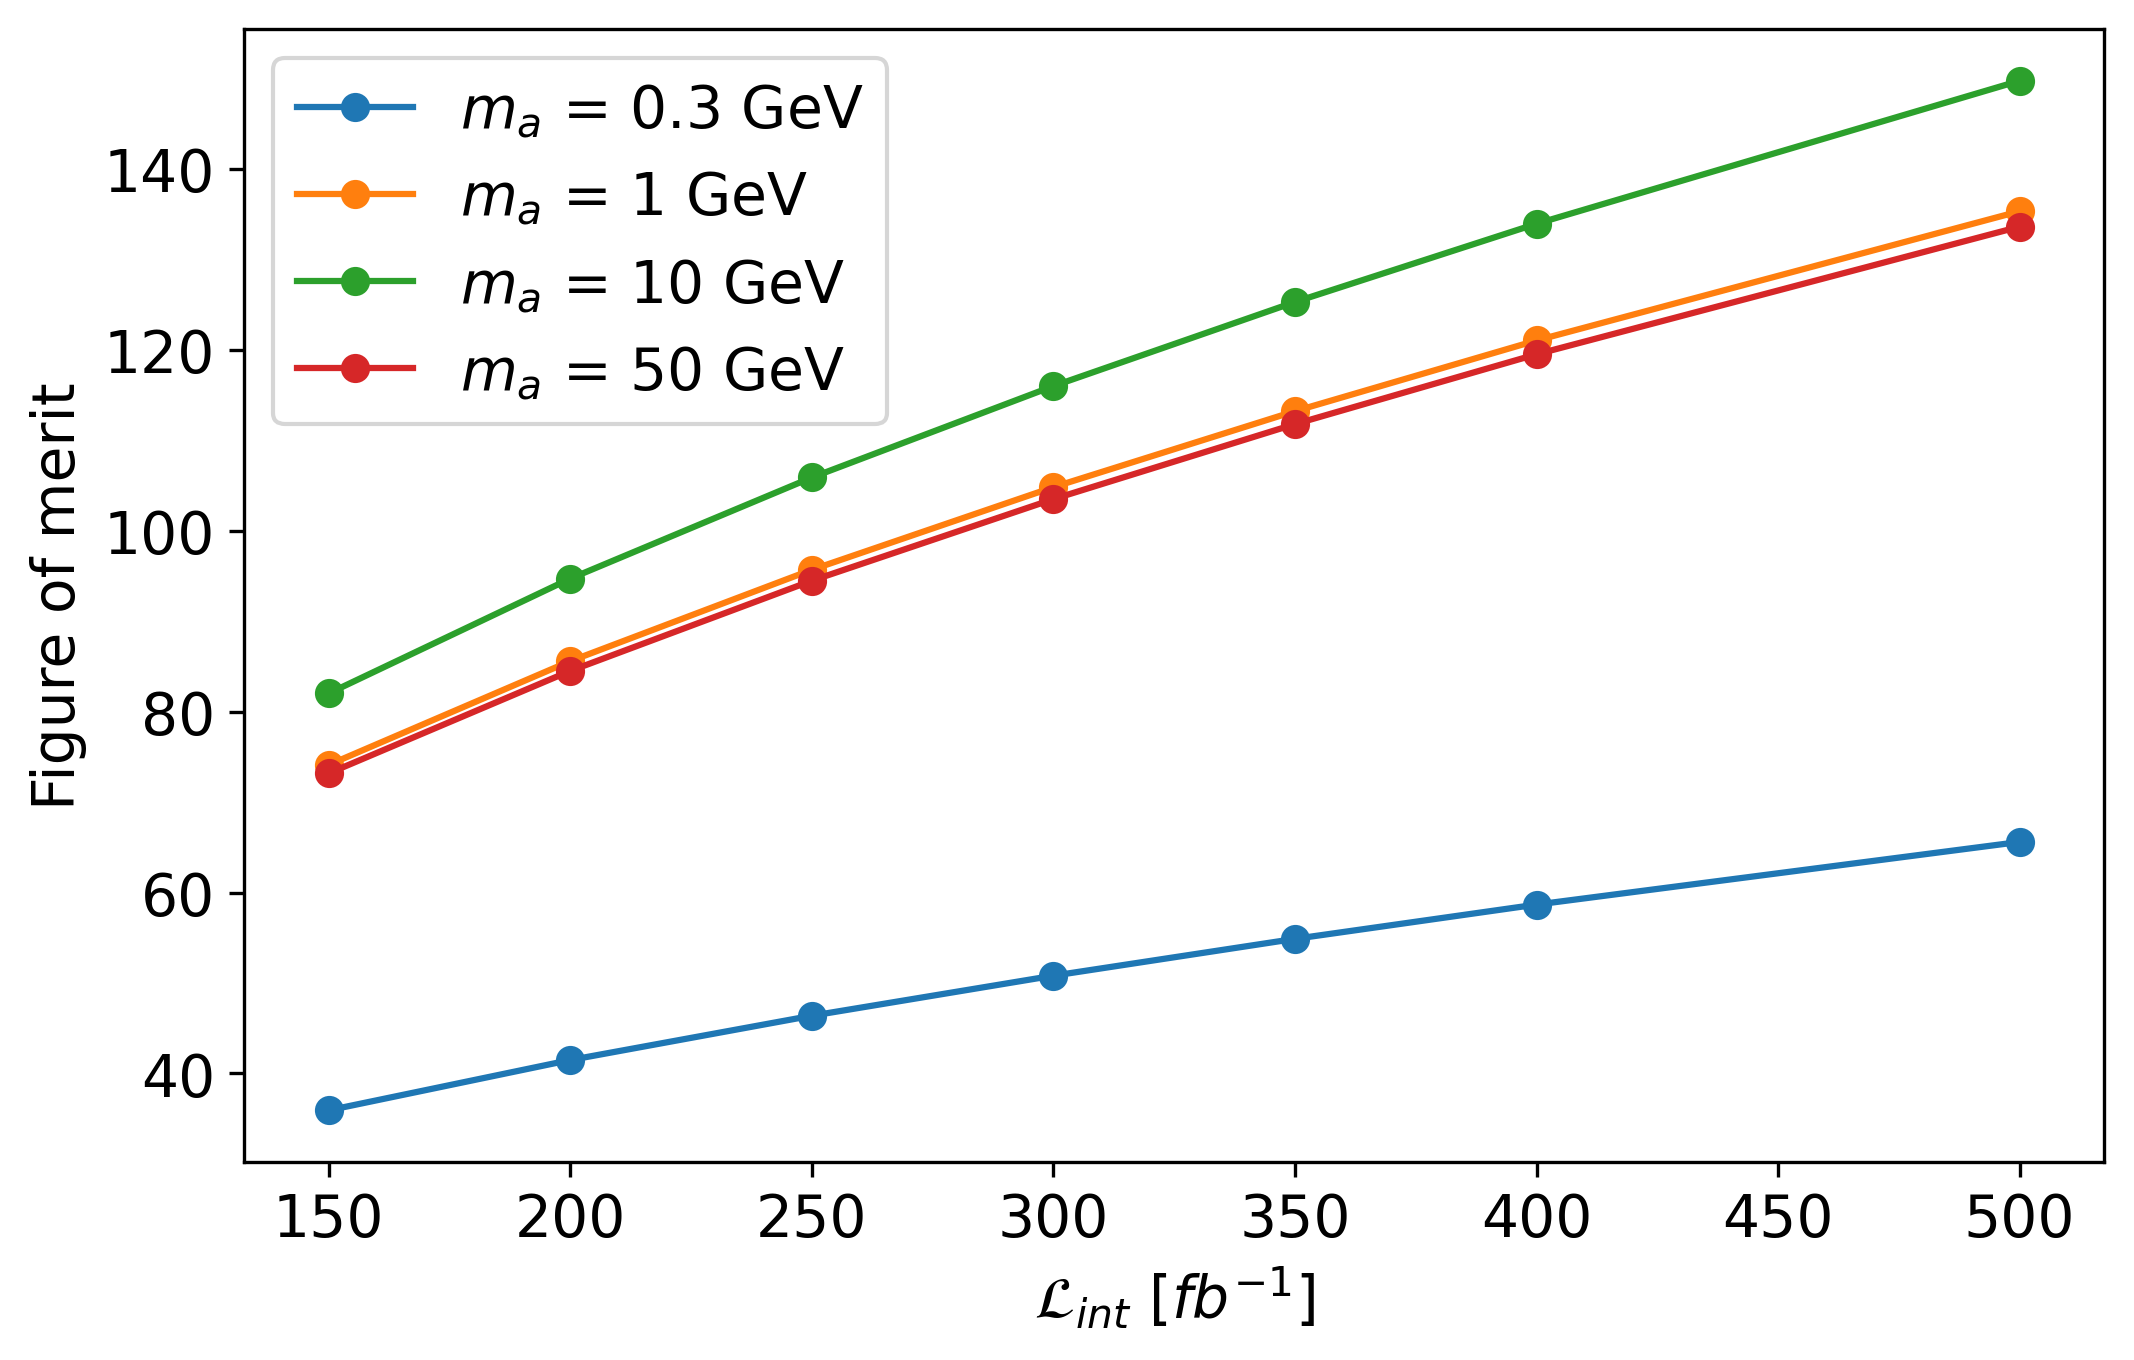

In [30]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_intlum)):
    ax.plot(intlum_fb,s_intlum[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\mathcal{L}_{int}$ [$fb^{-1}$]")
ax.set_ylabel("Figure of merit")
ax.legend()

fig, ax = plt.subplots()  # Create a figure containing a single axes.
for i in range(len(s_intlum)):
    ax.plot(intlum_fb,s_intlum_bkg[i], 'o-',label=r"$m_a$ = "+str(masses[i])+" GeV")
ax.set_xlabel(r"$\mathcal{L}_{int}$ [$fb^{-1}$]")
ax.set_ylabel("Figure of merit")
ax.legend()